In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
import os

In [2]:
# Define the function
def func_distance(x, A, lambda1, lambda2):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    term1 = A * np.exp(-x/lambda1)
    term2 = (1 - A) * np.exp(-x/lambda2)
    return term1 + term2


# Parameters sampled from normal distributions
A = norm.rvs(loc=42.8, scale=1.8)
lambda1 = norm.rvs(loc=3.78, scale=0.25)
lambda2 = norm.rvs(loc=0.035, scale=0.001)


def func_signal(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)




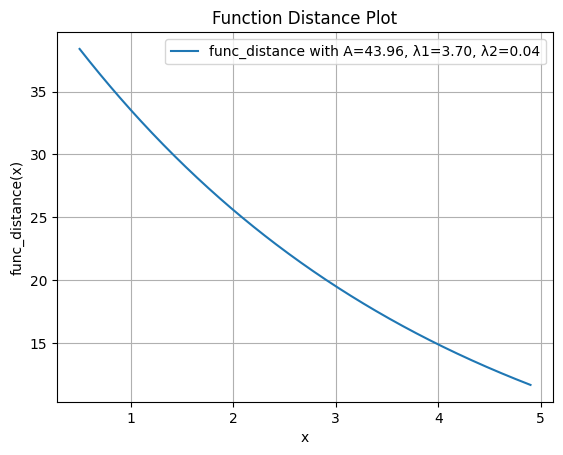

In [3]:
# Generate x values
x = np.linspace(0.5, 4.9, 400)  # Start from 0.1 to avoid division by zero

# Compute y values
y = func_distance(x, A, lambda1, lambda2)

# Create the plot
plt.plot(x, y, label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}')

# Add title and labels
plt.title('Function Distance Plot')
plt.xlabel('x')
plt.ylabel('func_distance(x)')


# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Sampled parameters: A=43.95929253350901, lambda1=3.6956918933998546, lambda2=0.03530049402456242


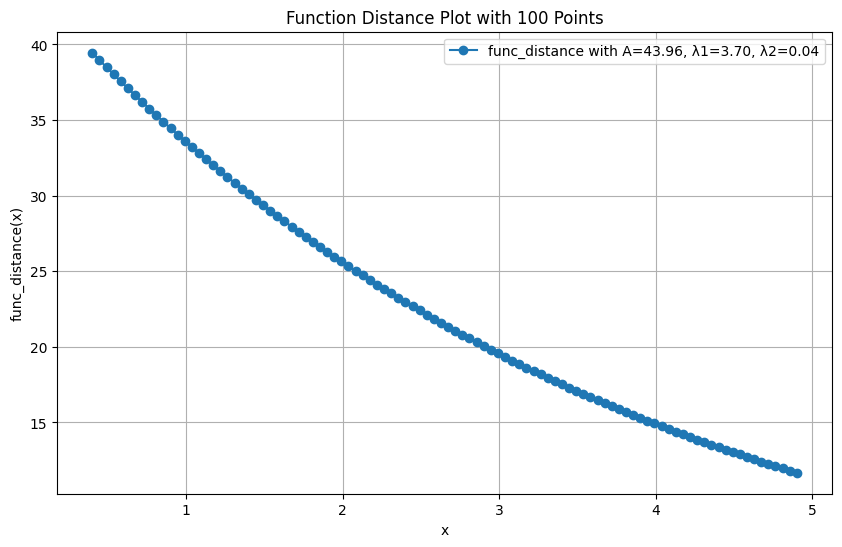

In [4]:
# Print the sampled parameters for reference
print(f"Sampled parameters: A={A}, lambda1={lambda1}, lambda2={lambda2}")

# Generate 100 x values within the range from 0.4 to 4.9
x_values = np.linspace(0.4, 4.9, 100)

# Compute the corresponding y values using the sampled parameters
y_values = func_distance(x_values, A, lambda1, lambda2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}')

# Add title and labels
plt.title('Function Distance Plot with 100 Points')
plt.xlabel('x')
plt.ylabel('func_distance(x)')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Sampled parameters: A=43.95929253350901, lambda1=3.6956918933998546, lambda2=0.03530049402456242


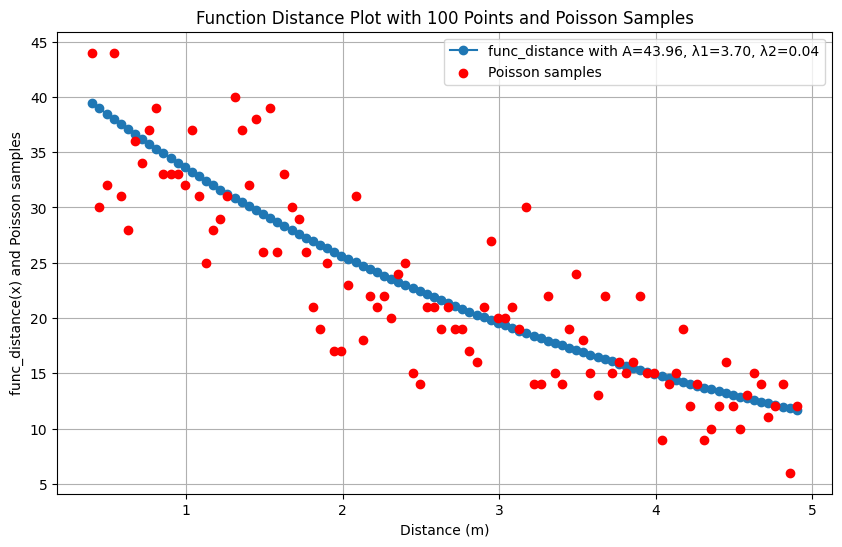

[44 30 32 44 31 28 36 34 37 39 33 33 33 32 37 31 25 28 29 31 40 37 32 38
 26 39 26 33 30 29 26 21 19 25 17 17 23 31 18 22 21 22 20 24 25 15 14 21
 21 19 21 19 19 17 16 21 27 20 20 21 19 30 14 14 22 15 14 19 24 18 15 13
 22 15 16 15 16 22 15 15  9 14 15 19 12 14  9 10 12 16 12 10 13 15 14 11
 12 14  6 12]


In [5]:
# Print the sampled parameters for reference
print(f"Sampled parameters: A={A}, lambda1={lambda1}, lambda2={lambda2}")

# Generate 100 x values within the range from 0.4 to 4.9
x_values = np.linspace(0.4, 4.9, 100)
y_values = func_distance(x_values, A, lambda1, lambda2)

# Use the y-values as parameters for a Poisson distribution and sample new points
poisson_samples = poisson.rvs(mu=np.abs(y_values))

# Save the new points to a file (optional)
np.savetxt("poisson_samples.txt", poisson_samples) # Very optional -> I dont think I need it

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}')
plt.scatter(x_values, poisson_samples, color='red', label='Poisson samples', zorder=5)

# Add title and labels
plt.title('Function Distance Plot with 100 Points and Poisson Samples')
plt.xlabel('Distance (m)')
plt.ylabel('func_distance(x) and Poisson samples')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the sampled Poisson values
print(poisson_samples)


Agregar el ploteo agrega casi 1 minuto a la simulación (corre en ~7sg contra ~70sg) -> asi que salvo que quiera mostrar los plots, es innecesaria.

In [6]:
def export_data_real_muon(t_values, summed_values, n_photons, index):
    # Create the directory if it doesn't exist
    folder_name = "real_muons"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # Define the file path with an index to ensure uniqueness
    filename = os.path.join(folder_name, f"photon_data_{n_photons}_photons_real_muon_{index}.txt")
    
    # Write the data to the file
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.


def simulate_photon_data_real_muon(n_photons, index):
    lambda_rate = 0.1 # LAMBDA RATE = 0.1
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    t_values = np.linspace(0, 150, 3000)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    #plt.figure(figsize=(10, 6))

    for offset in random_offsets:
        individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_real_muon(t_values, summed_values, n_photons, index)

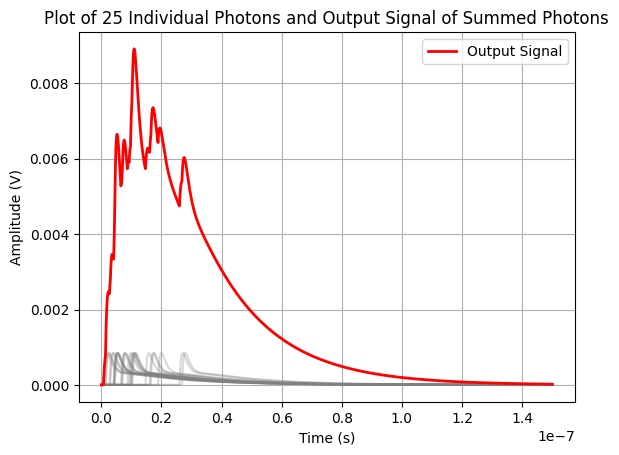

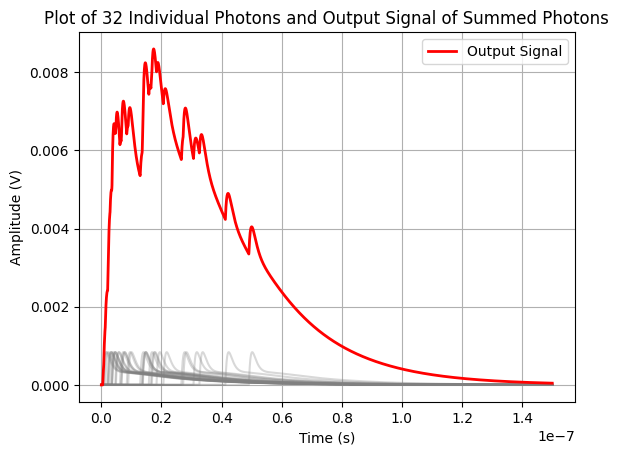

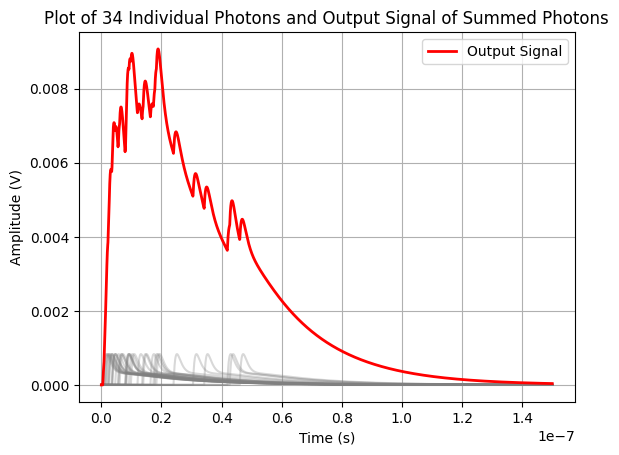

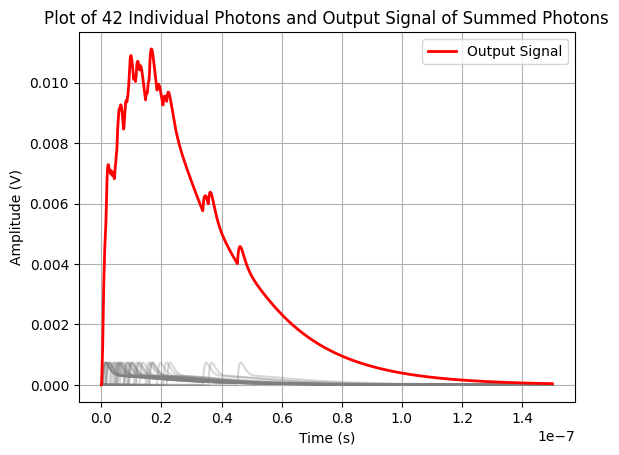

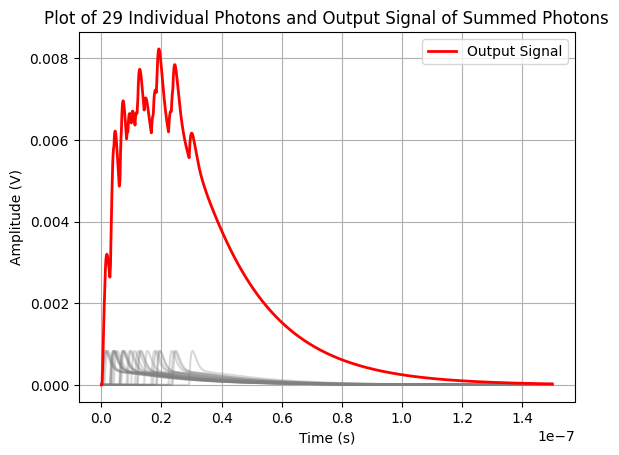

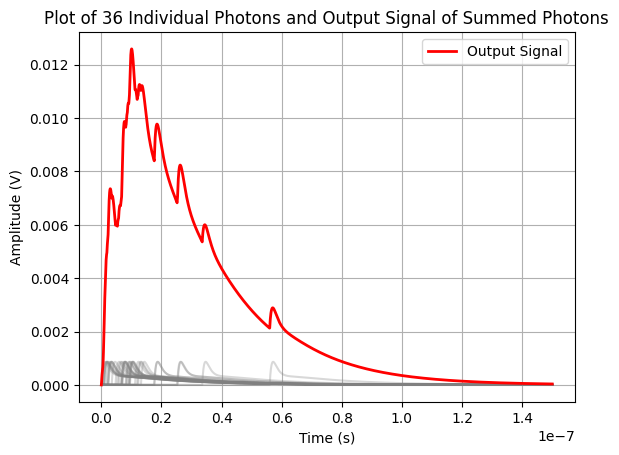

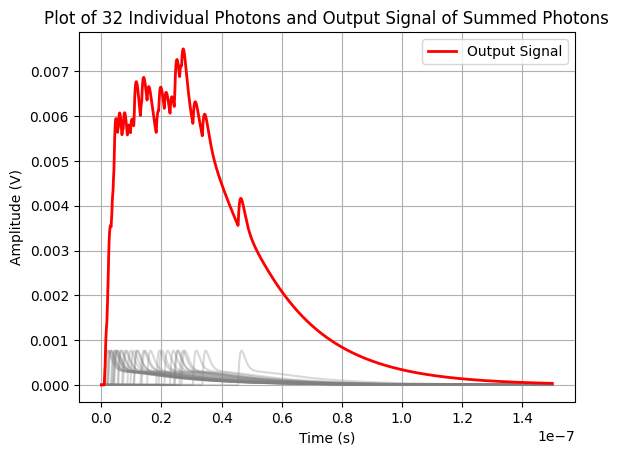

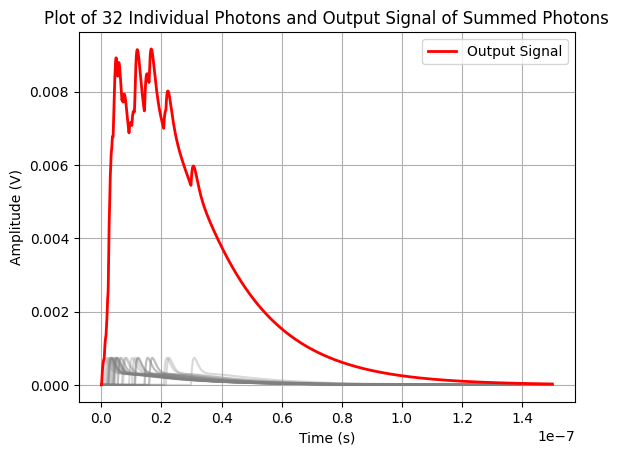

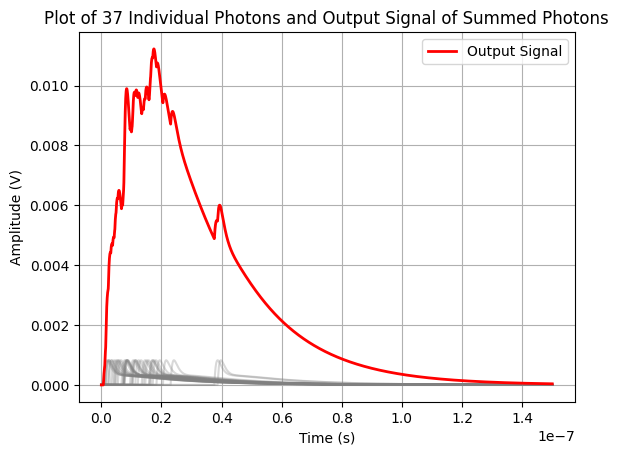

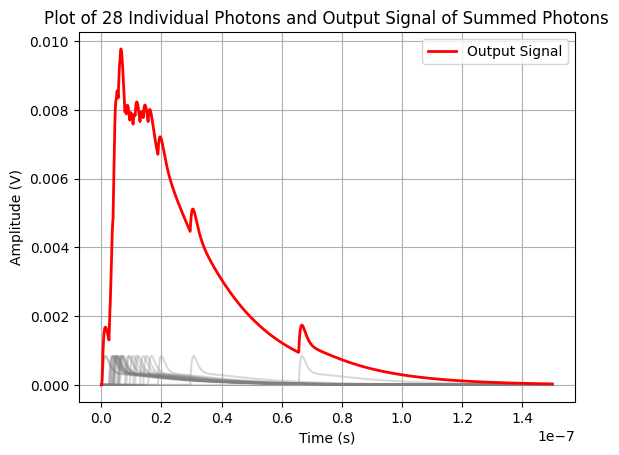

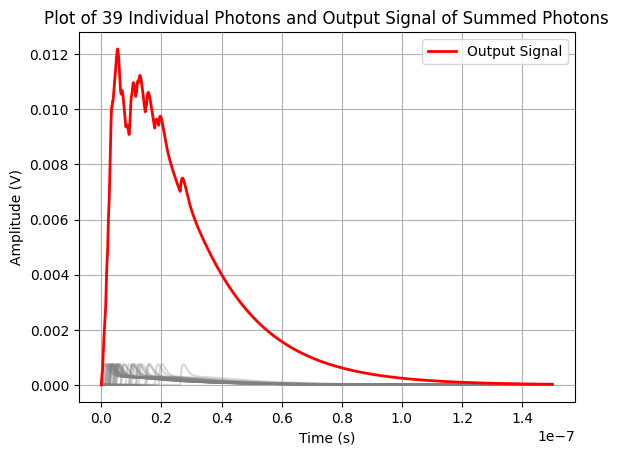

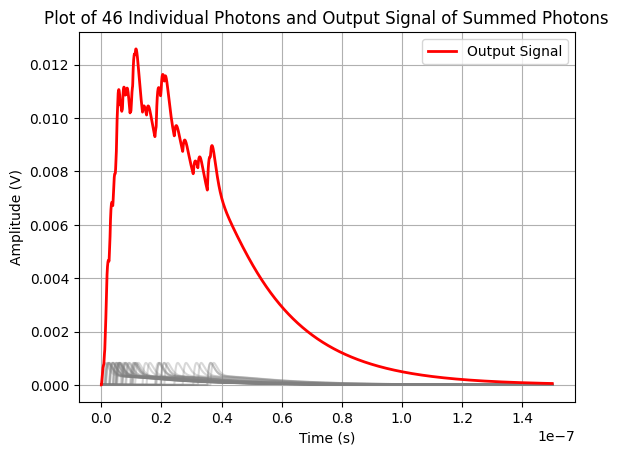

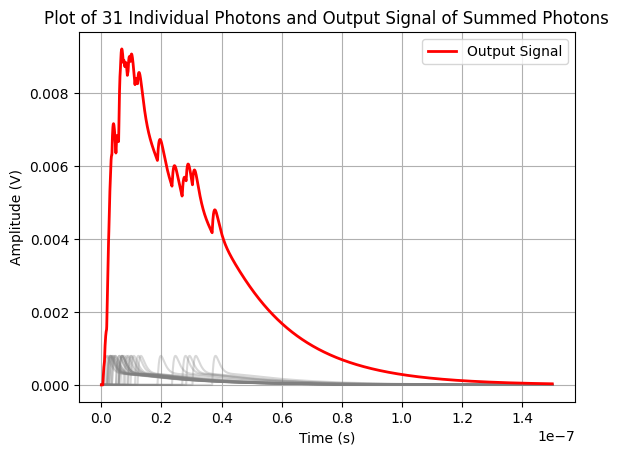

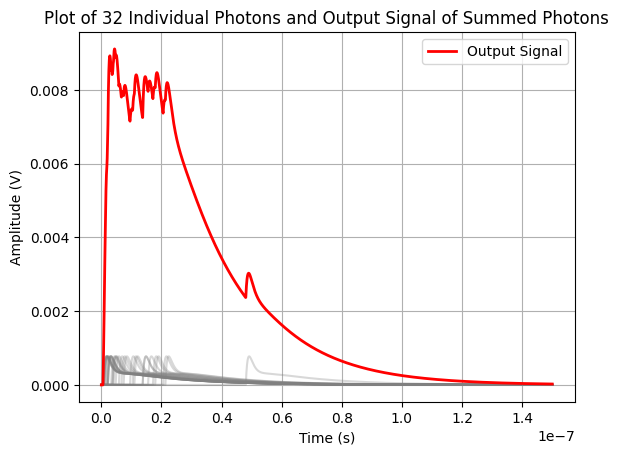

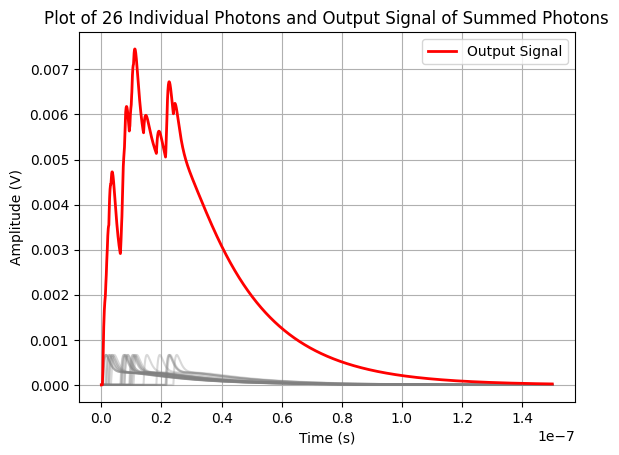

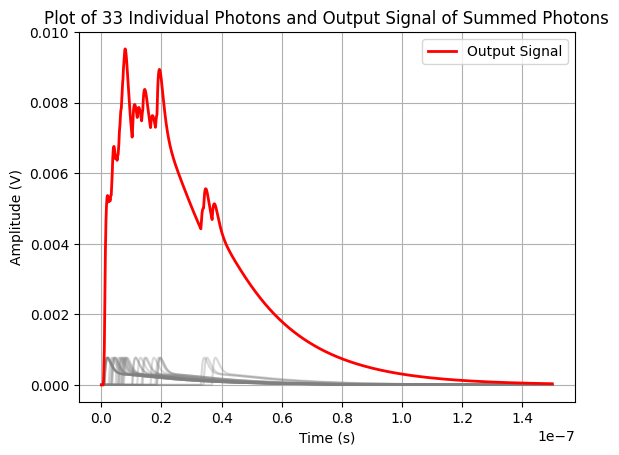

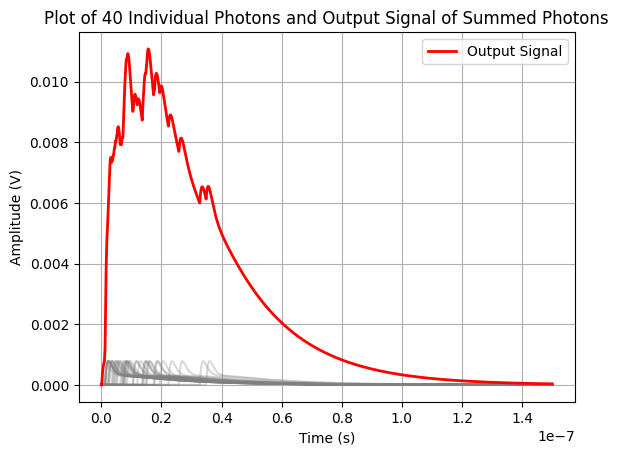

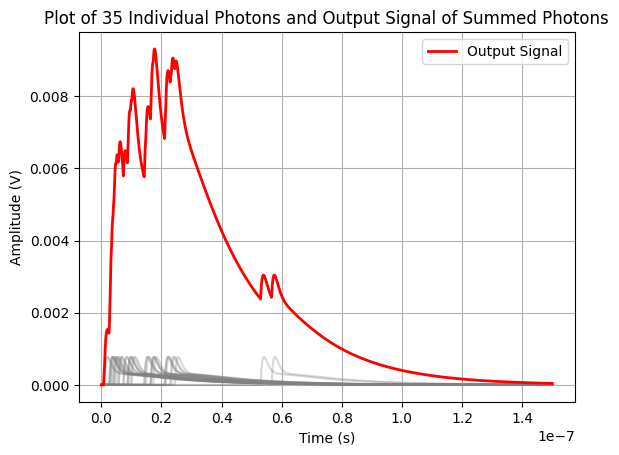

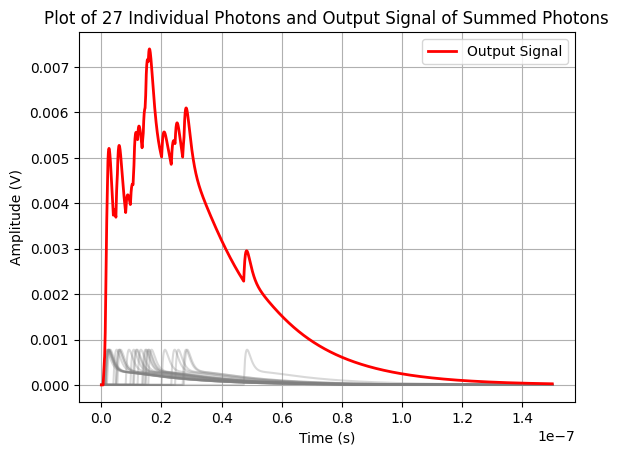

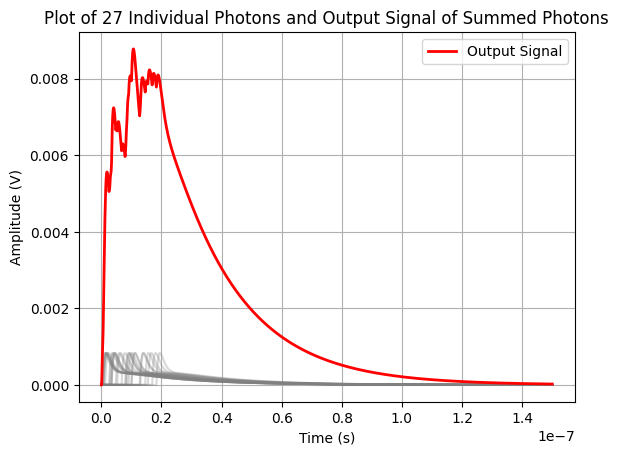

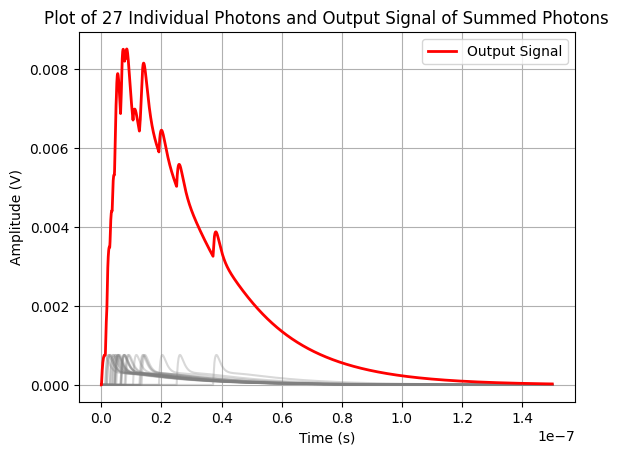

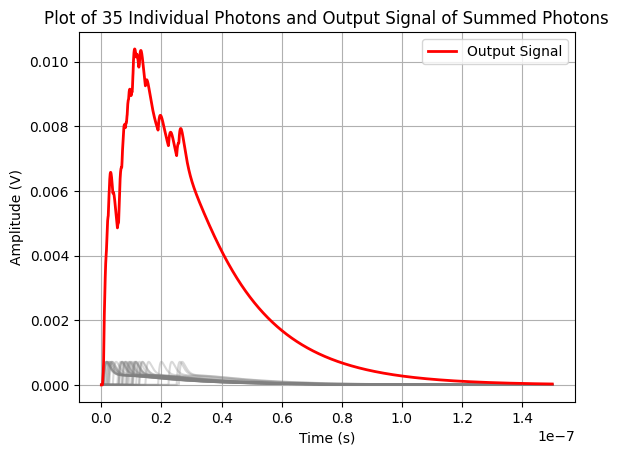

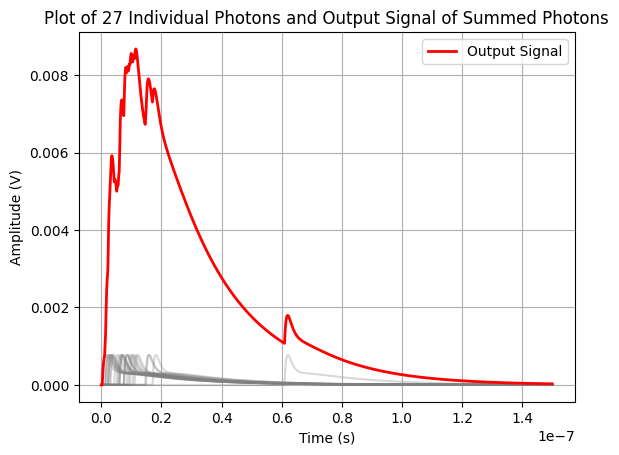

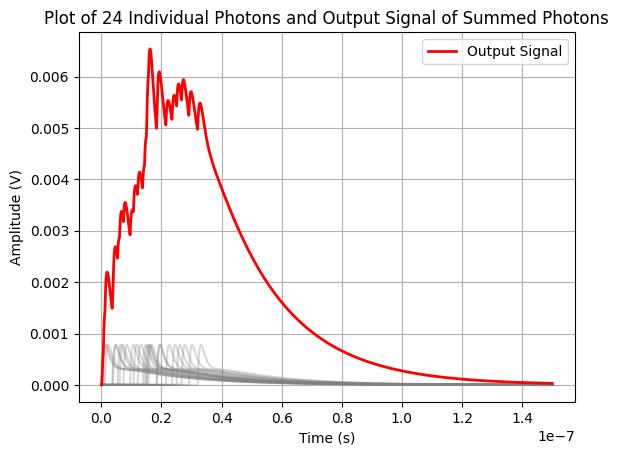

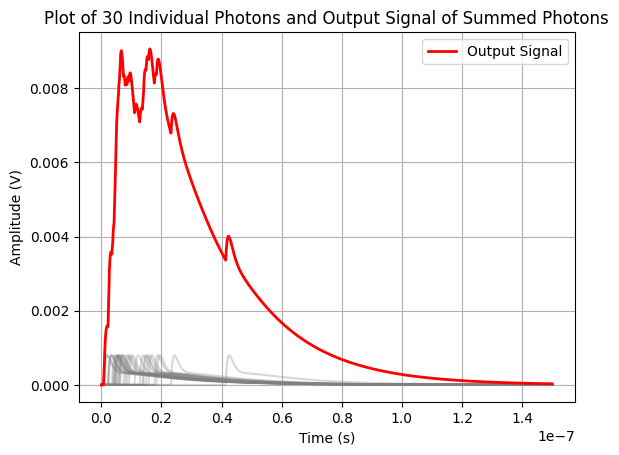

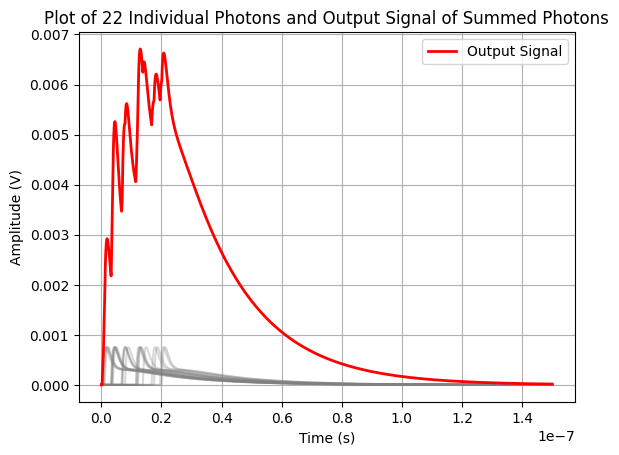

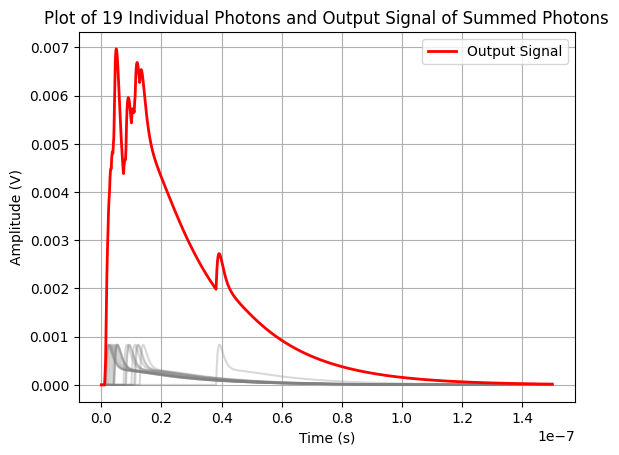

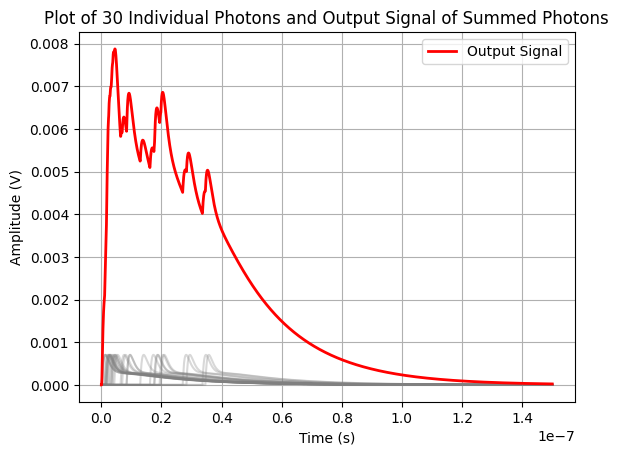

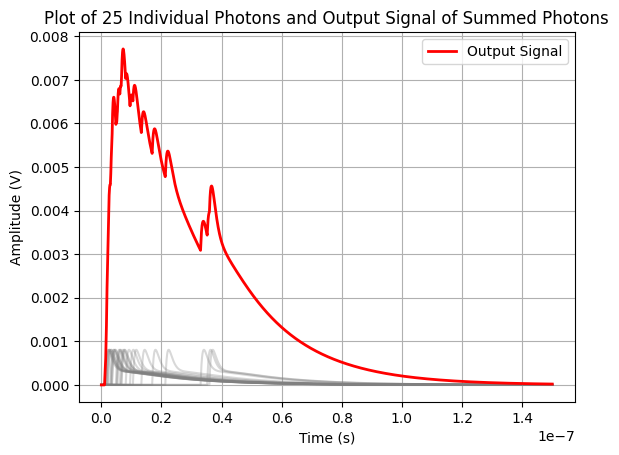

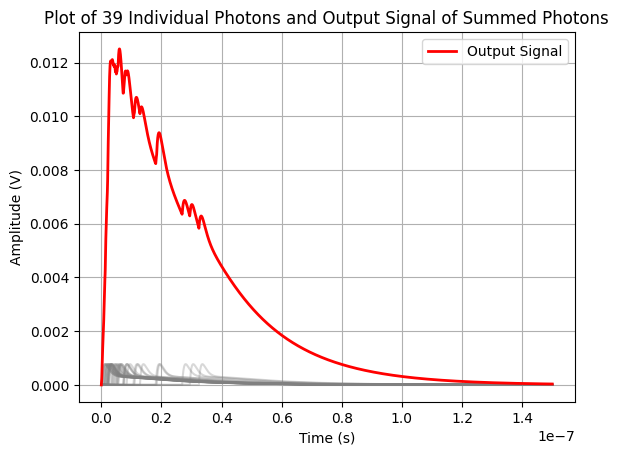

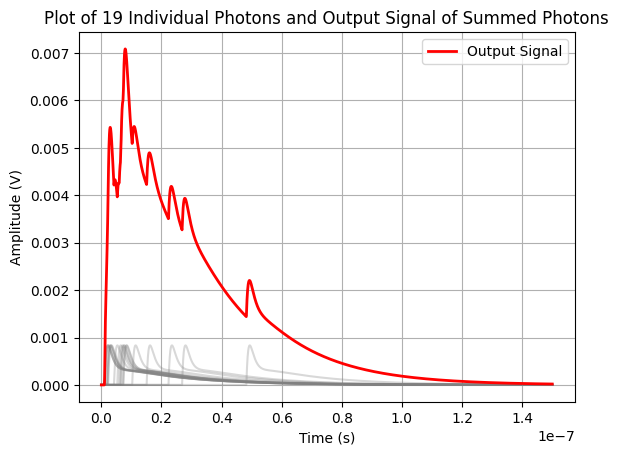

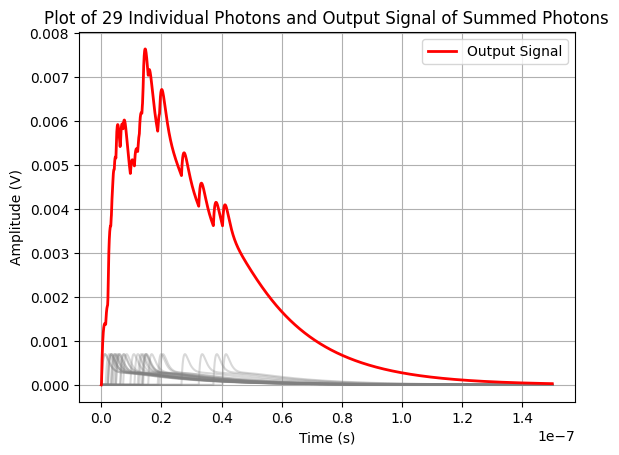

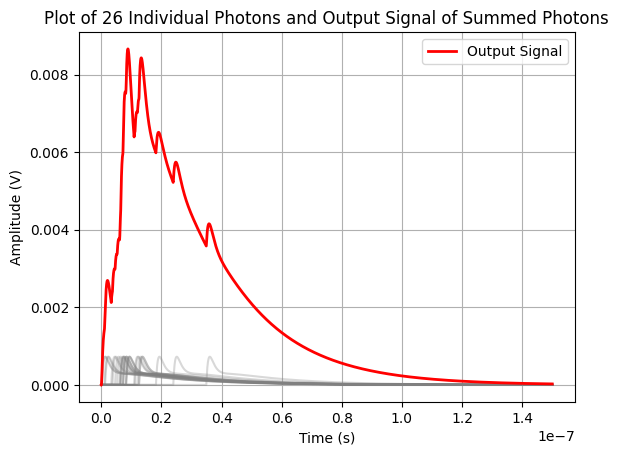

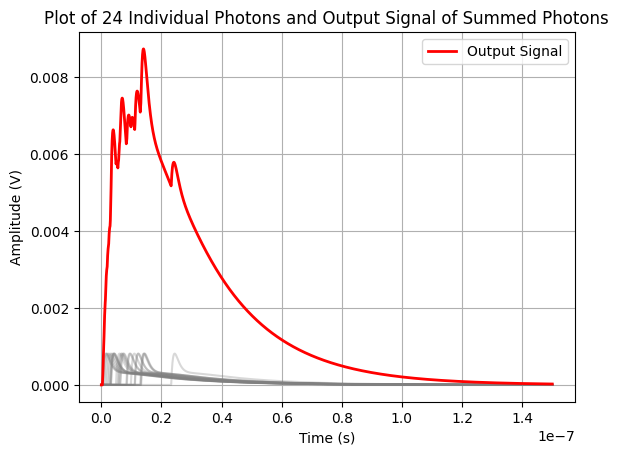

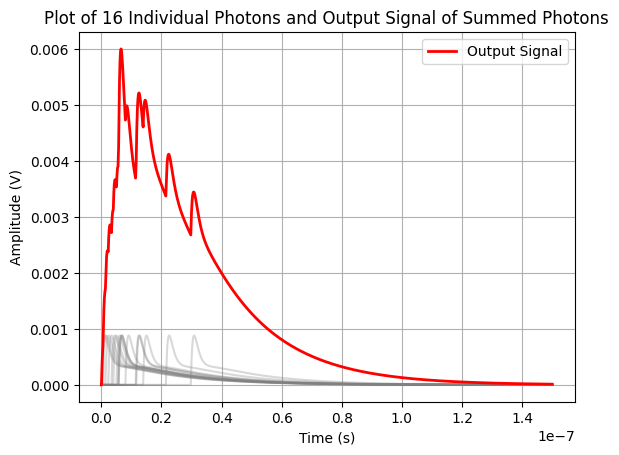

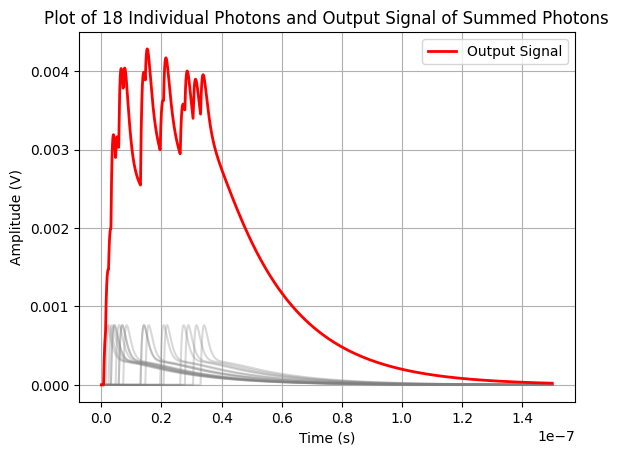

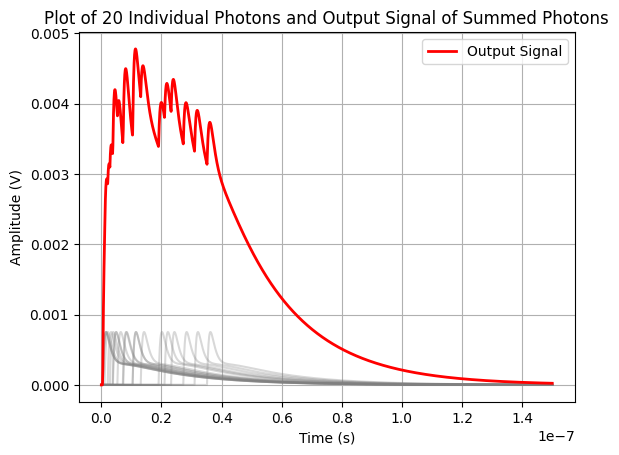

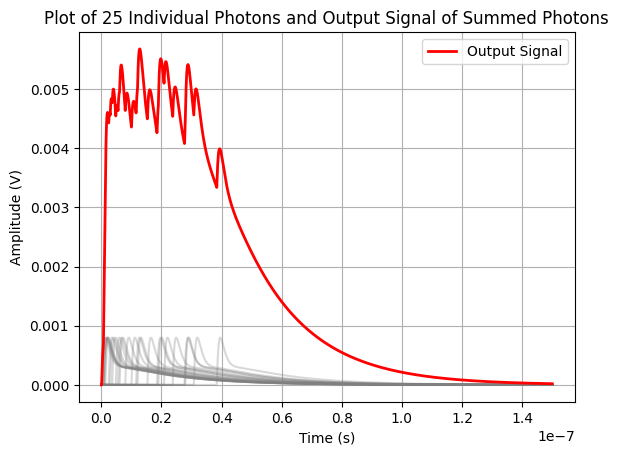

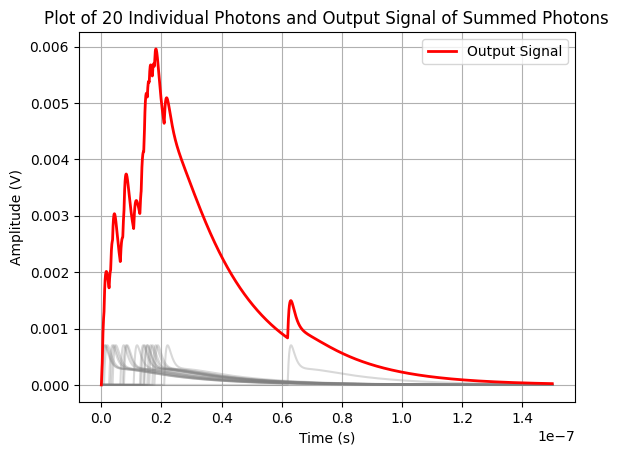

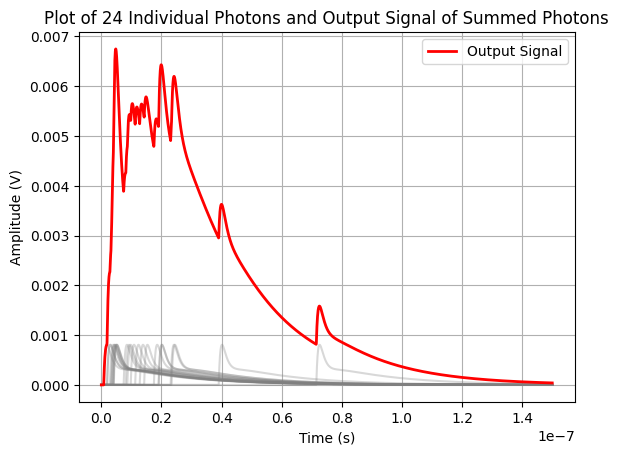

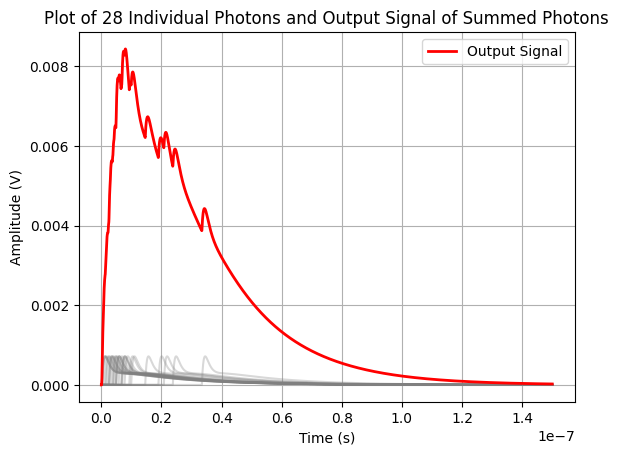

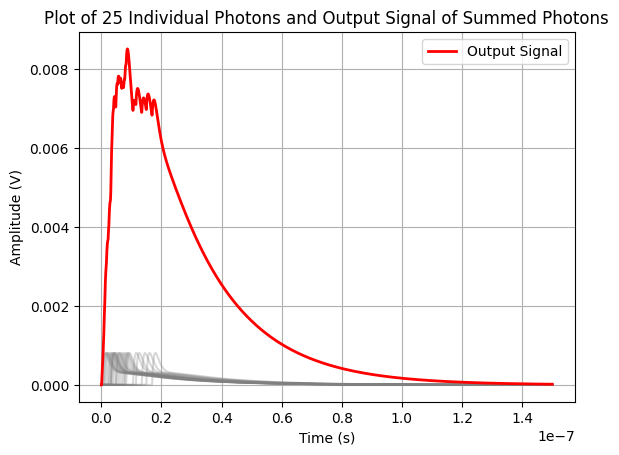

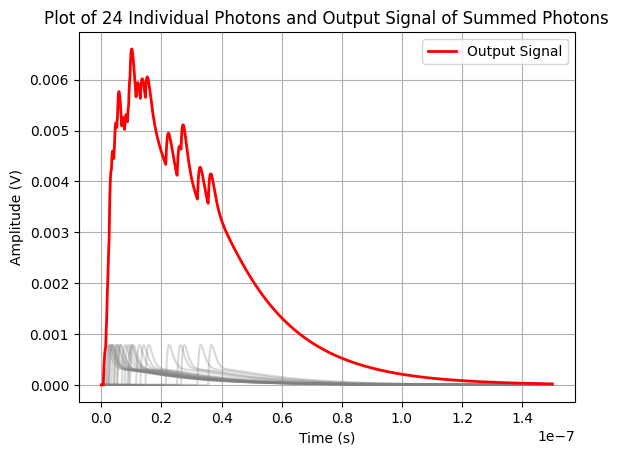

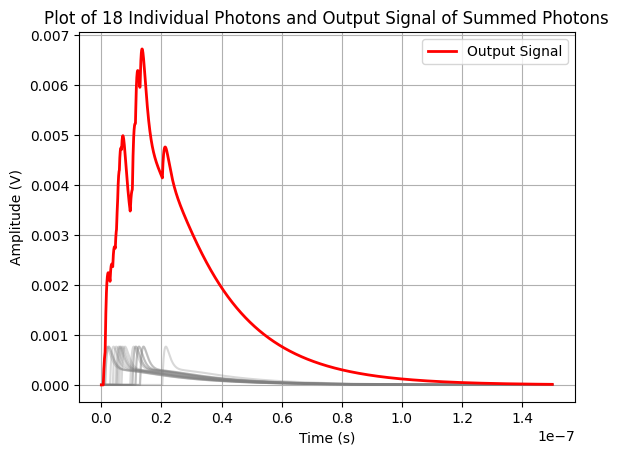

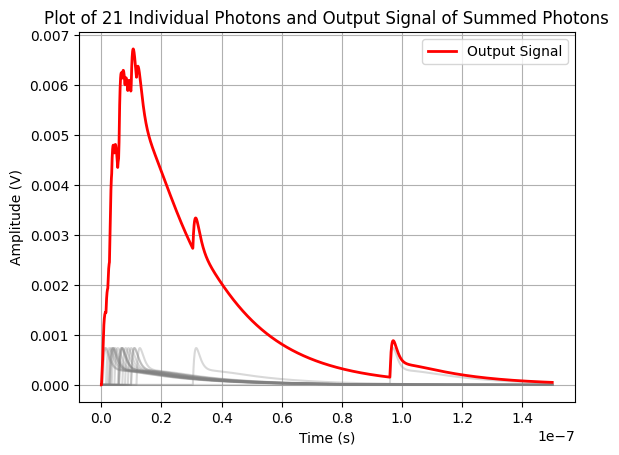

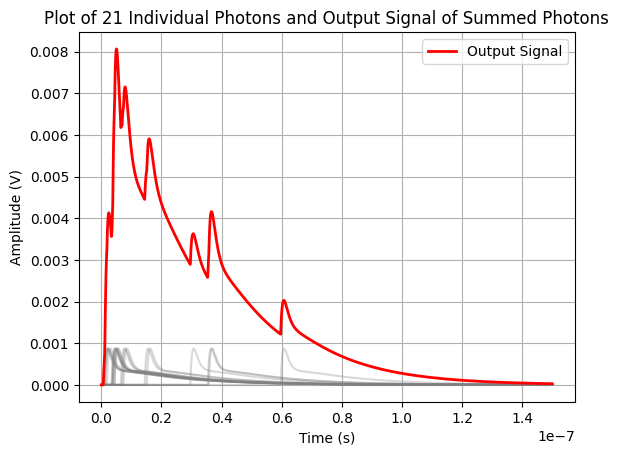

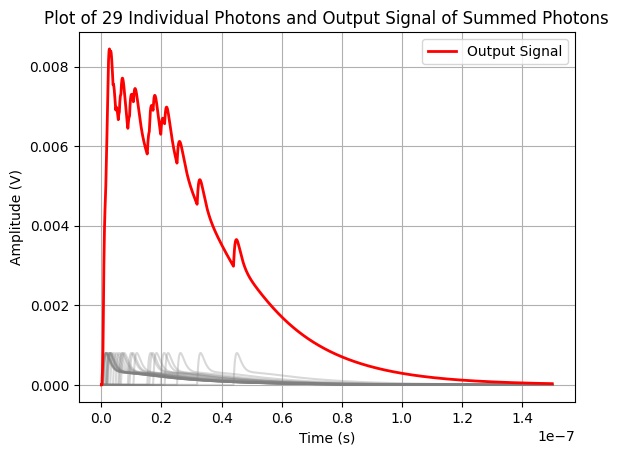

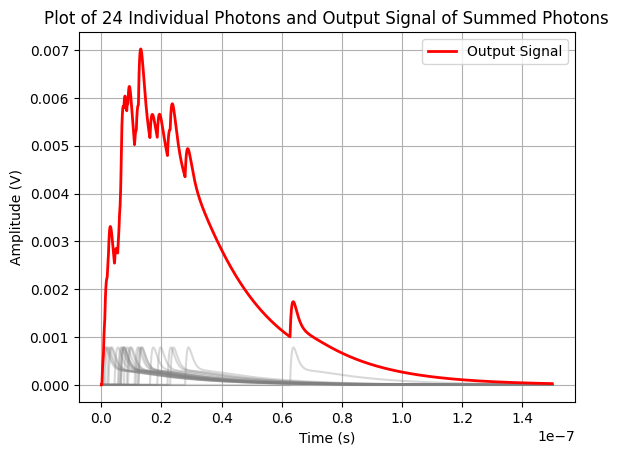

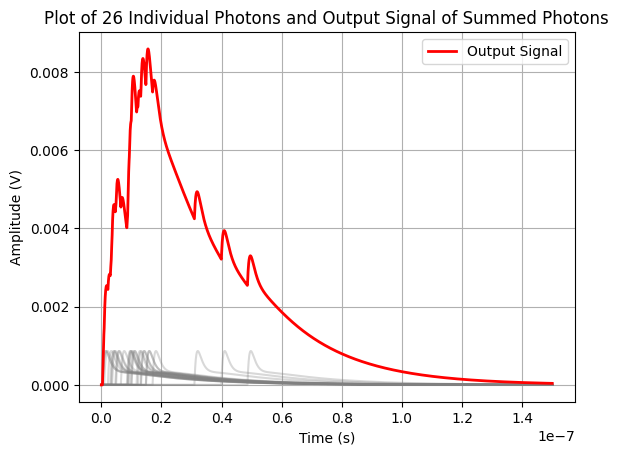

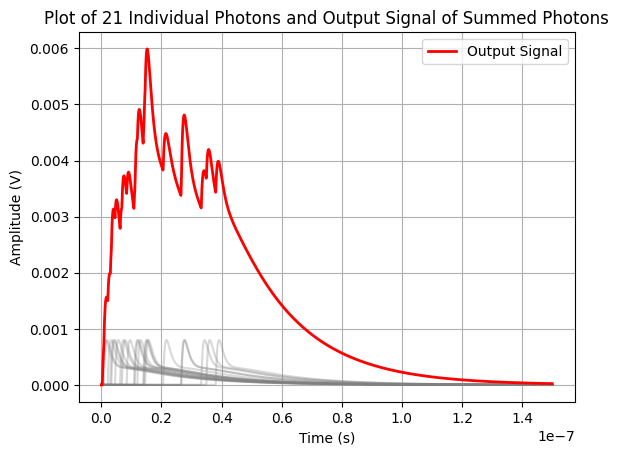

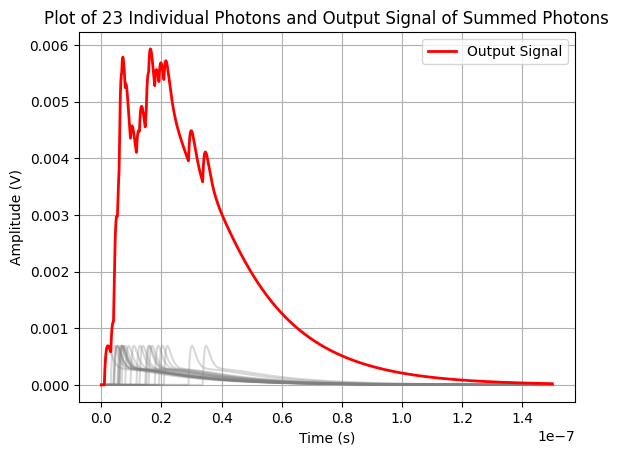

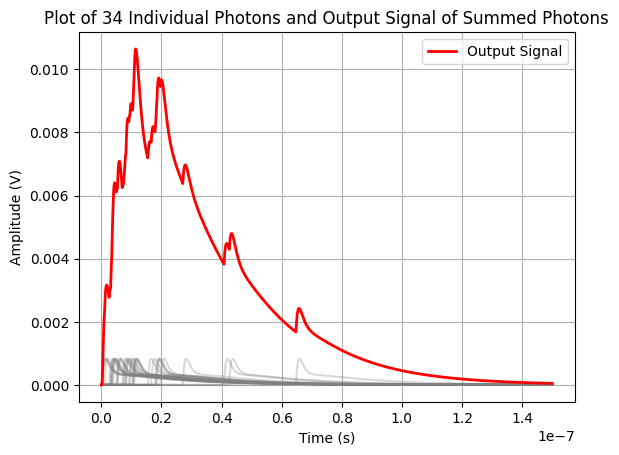

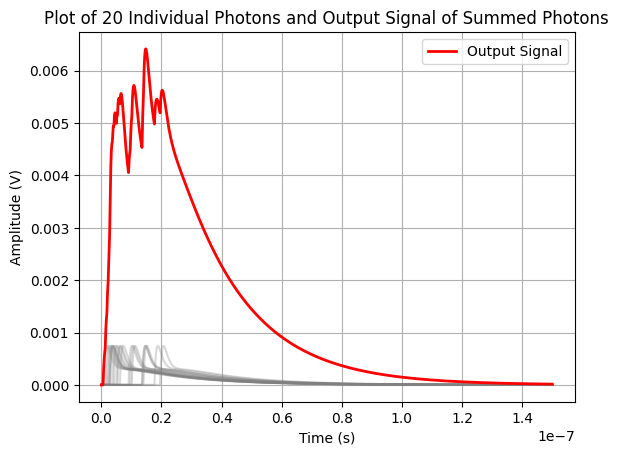

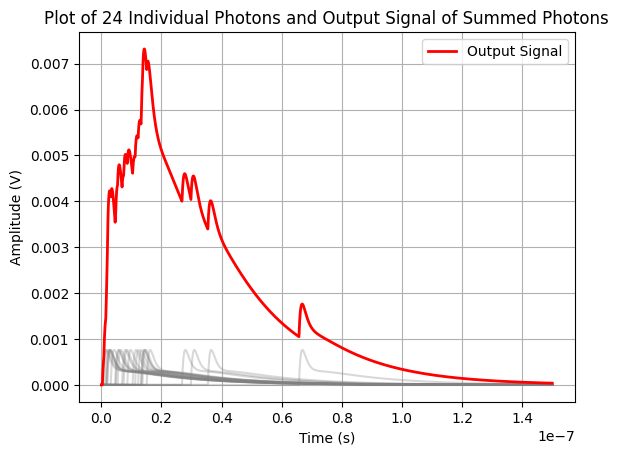

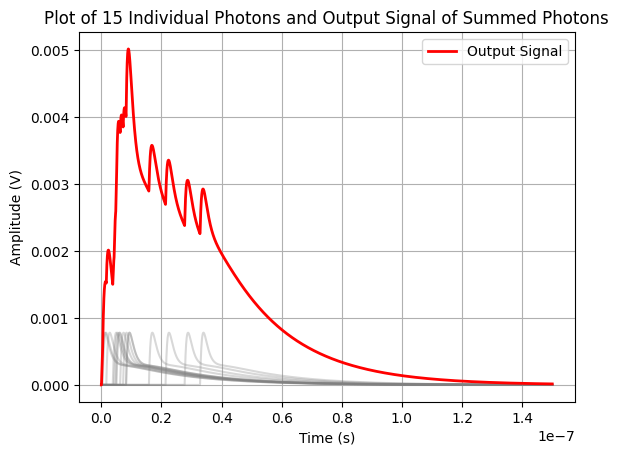

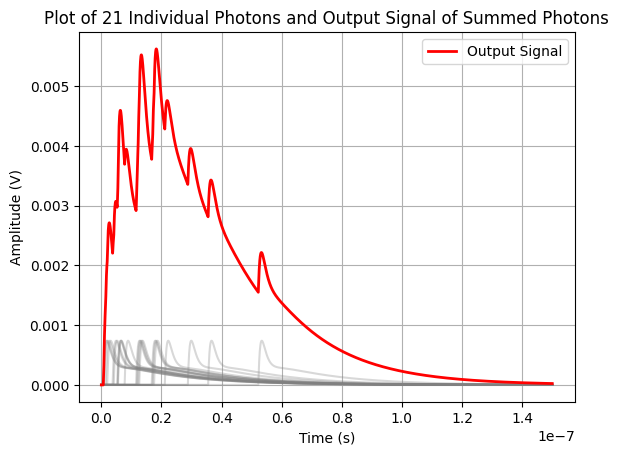

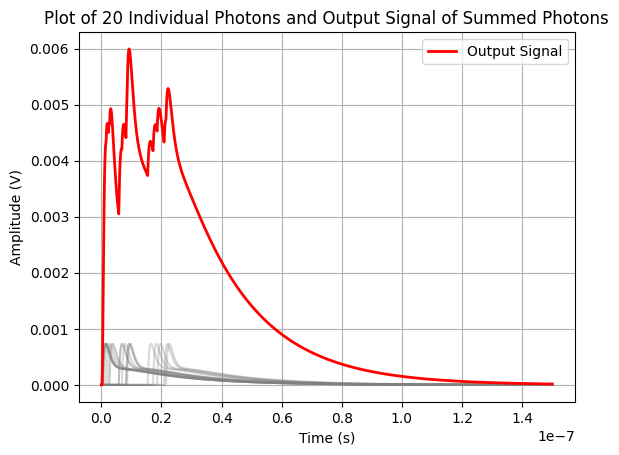

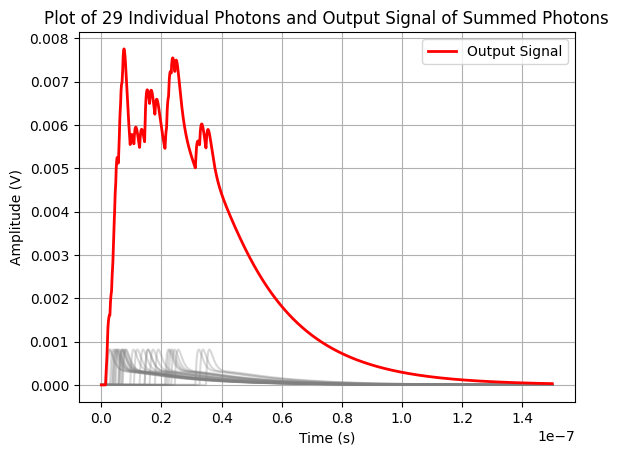

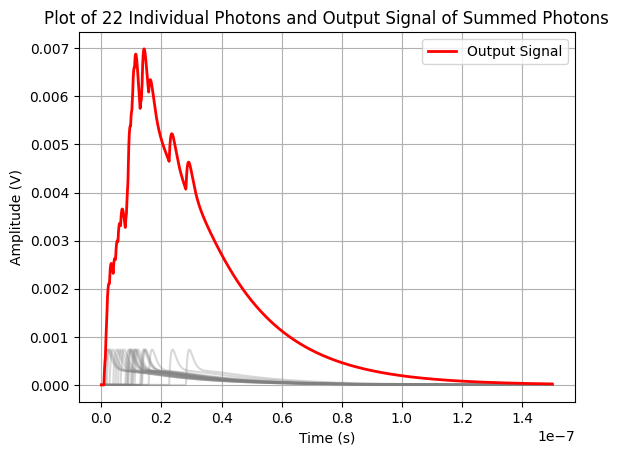

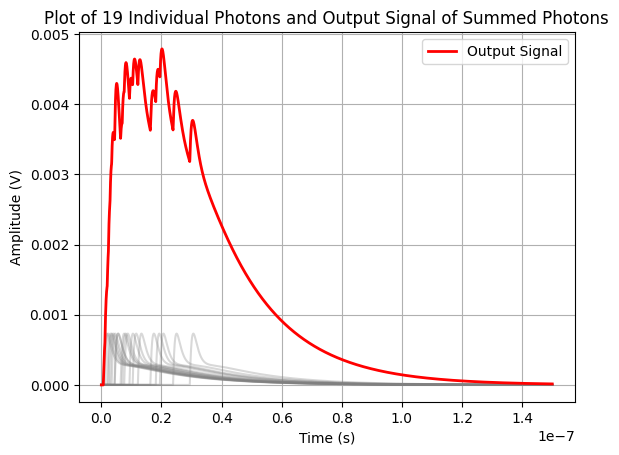

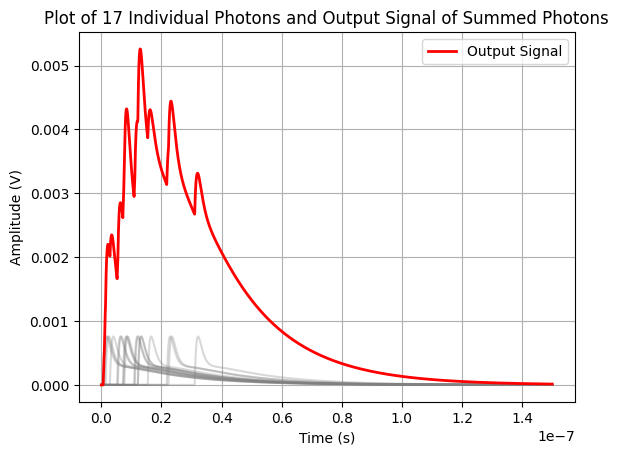

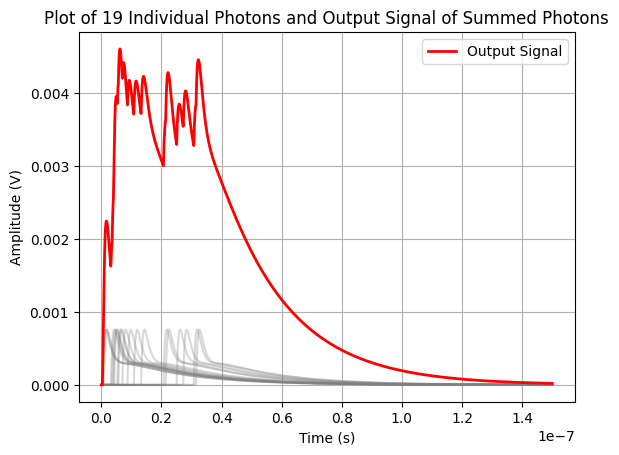

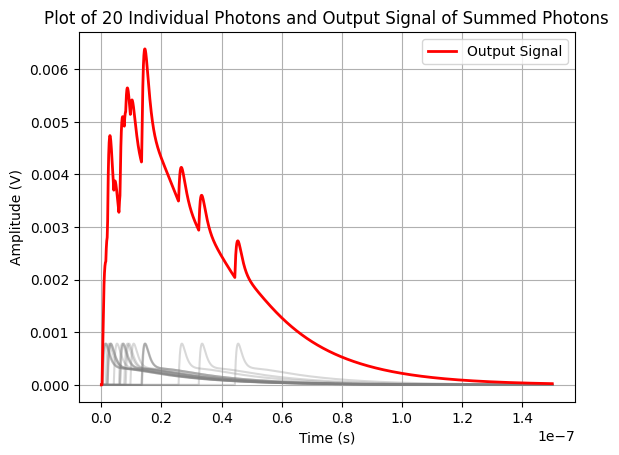

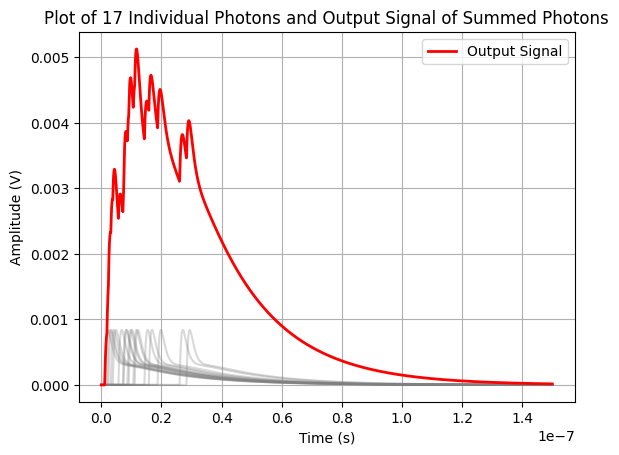

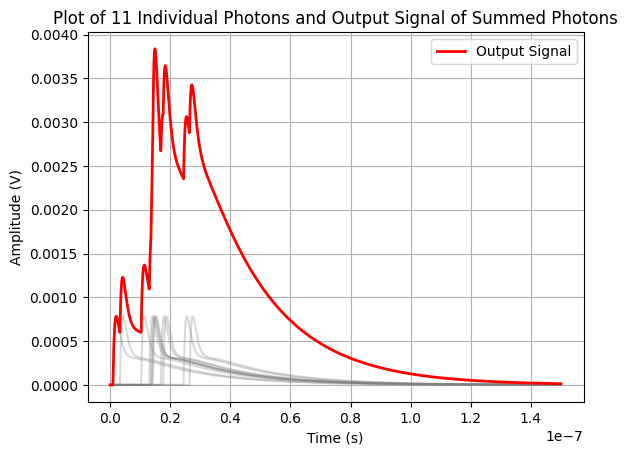

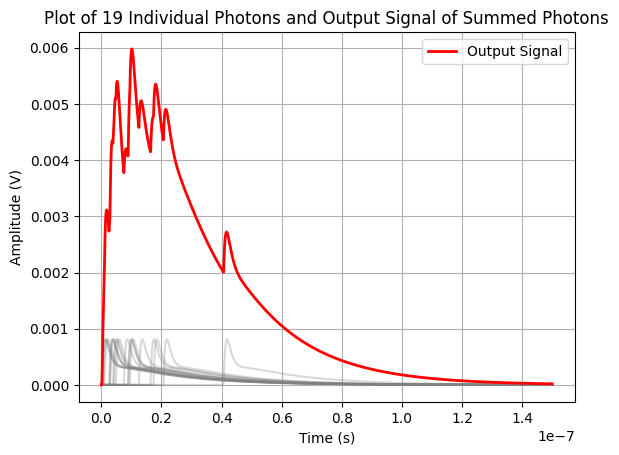

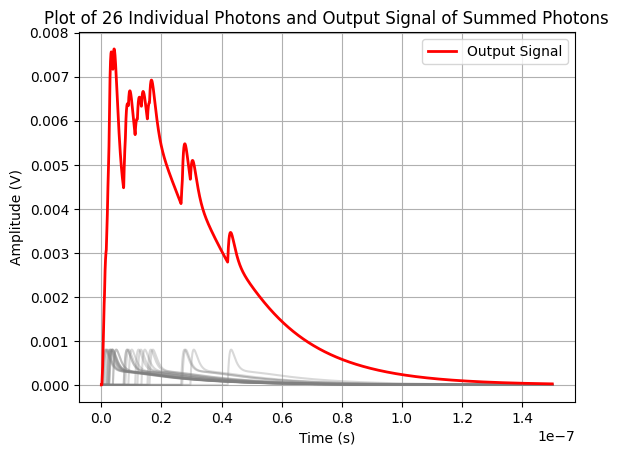

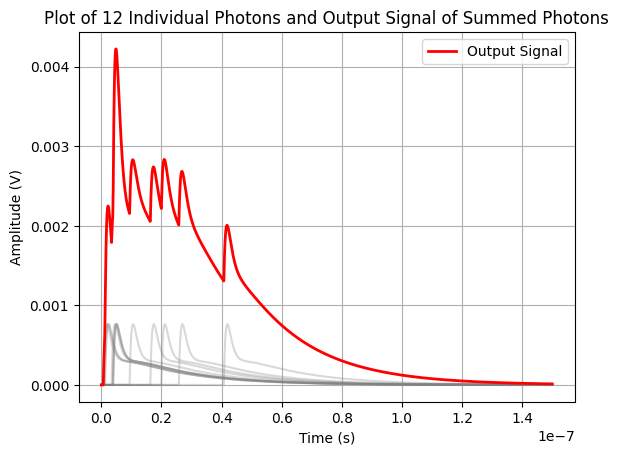

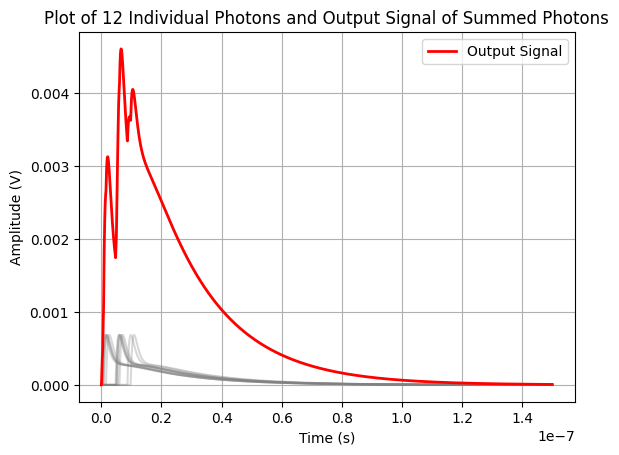

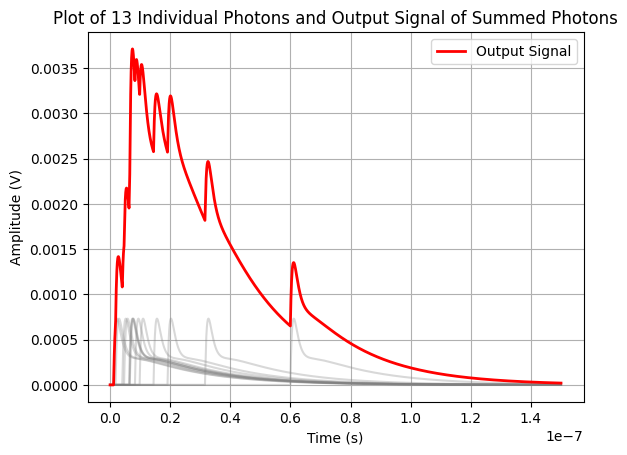

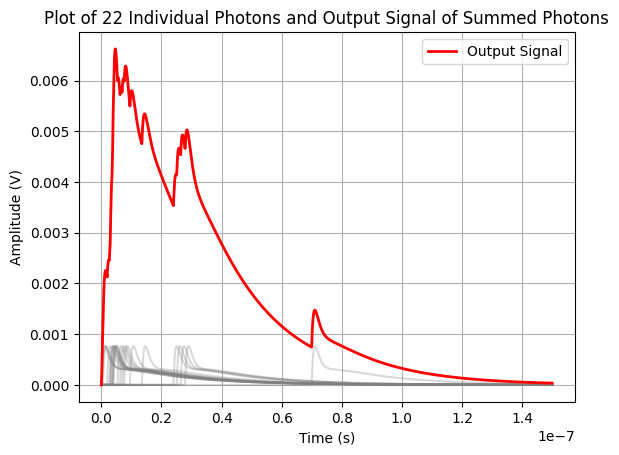

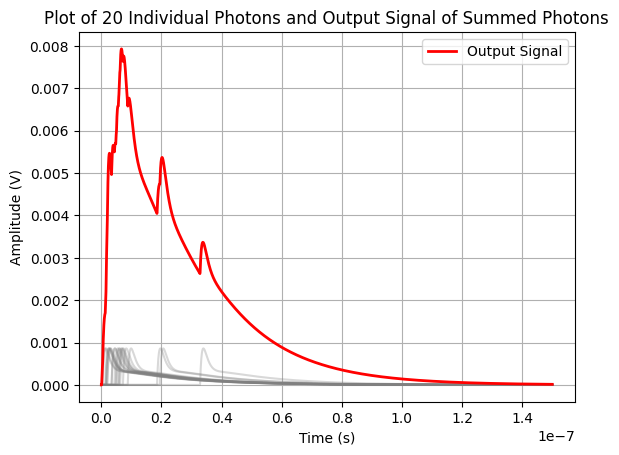

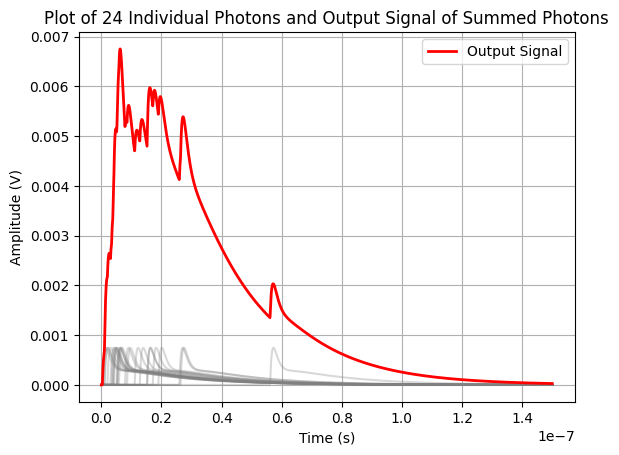

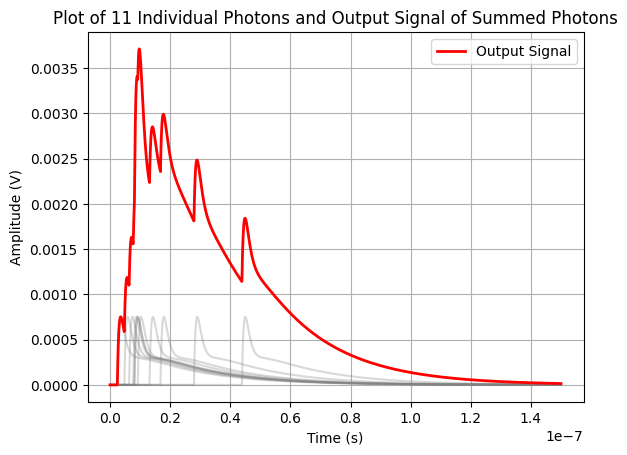

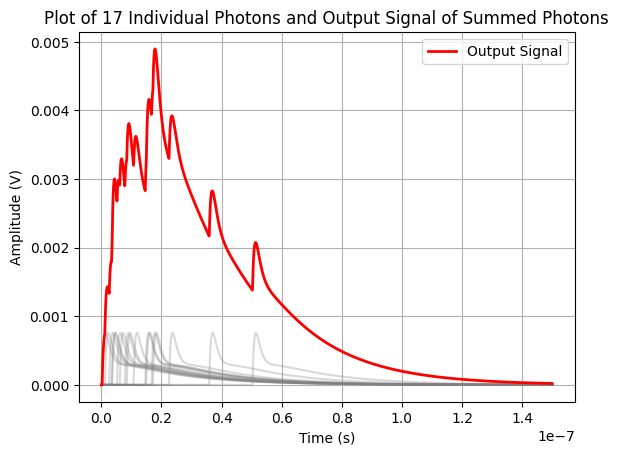

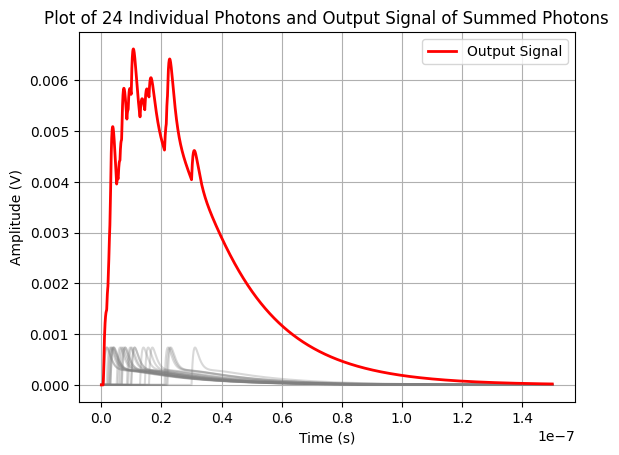

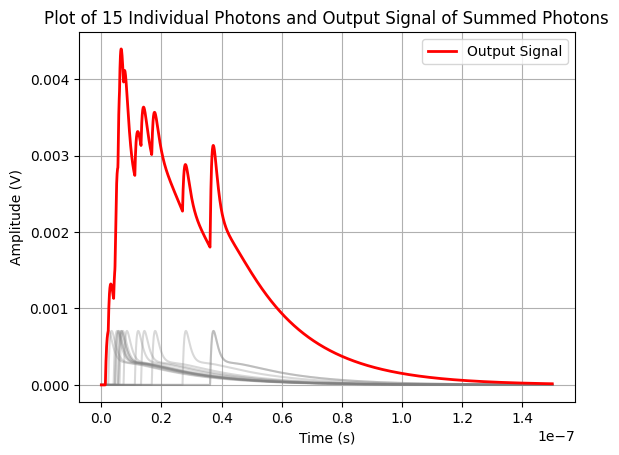

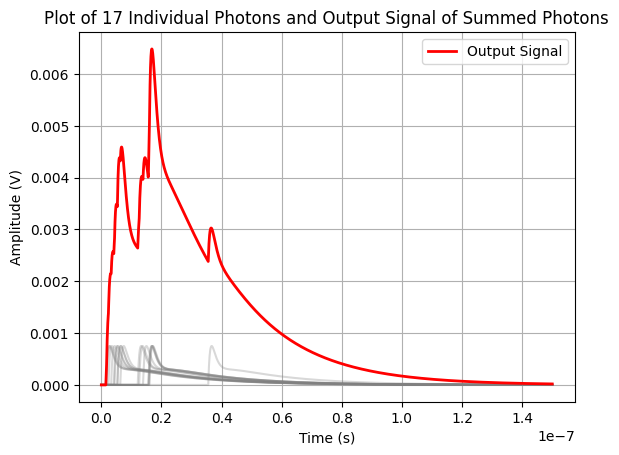

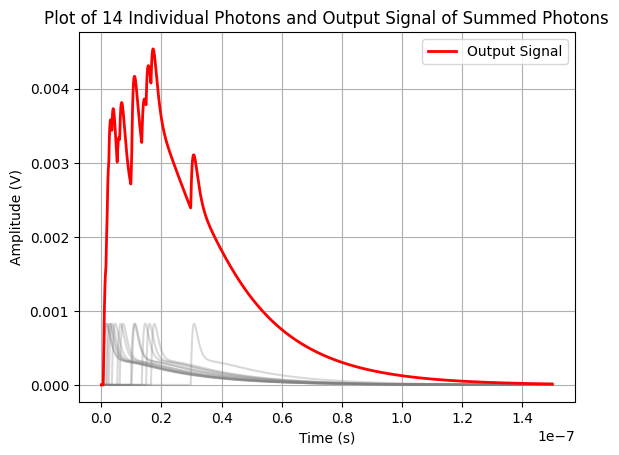

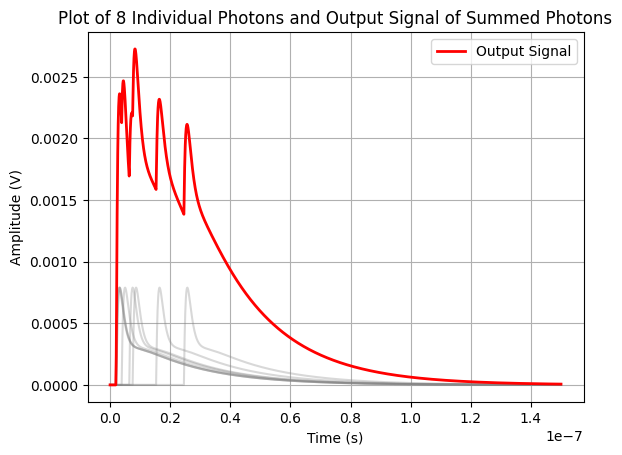

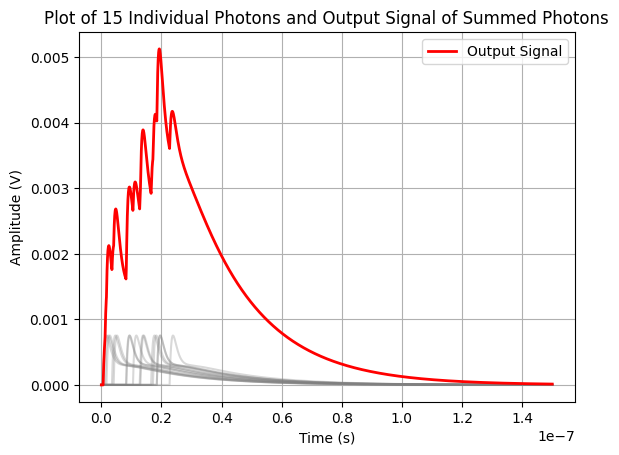

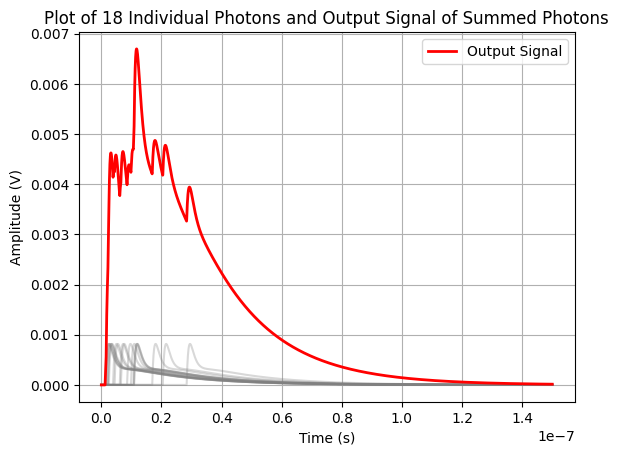

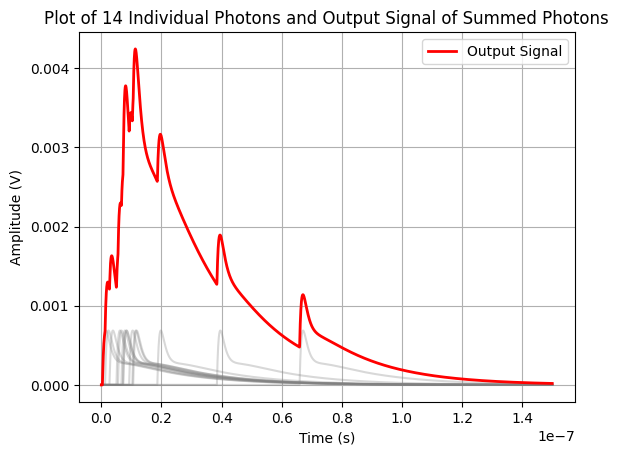

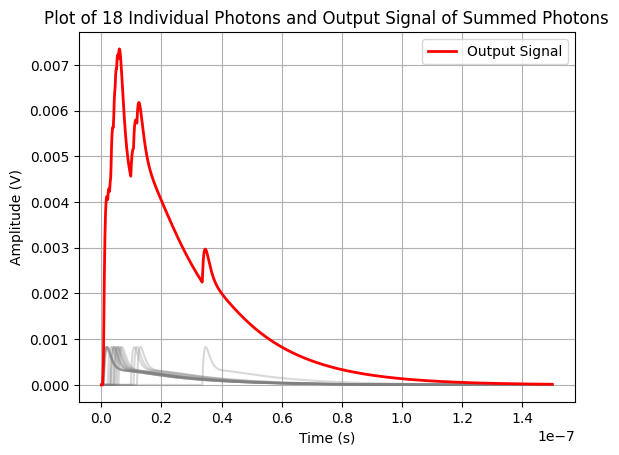

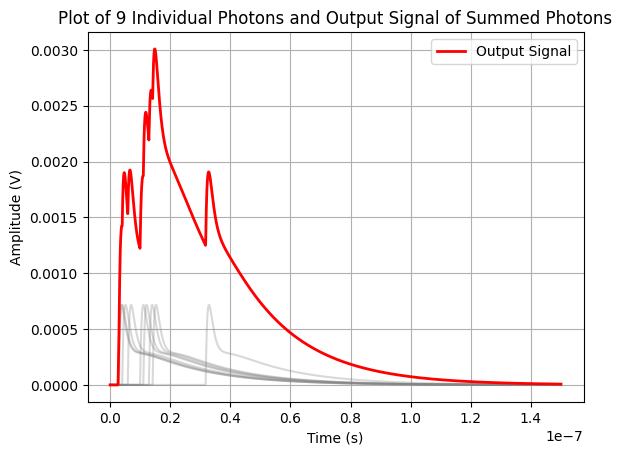

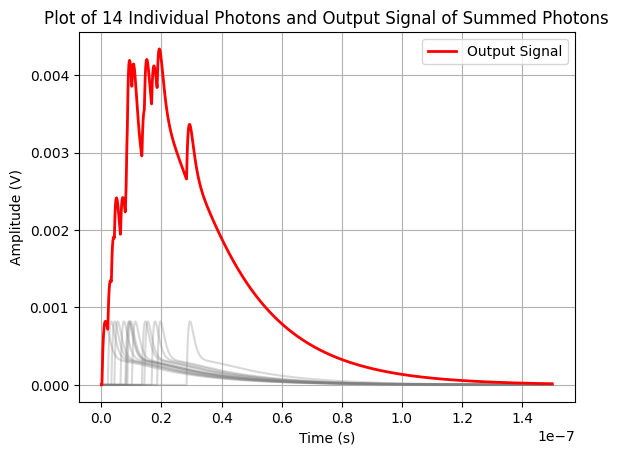

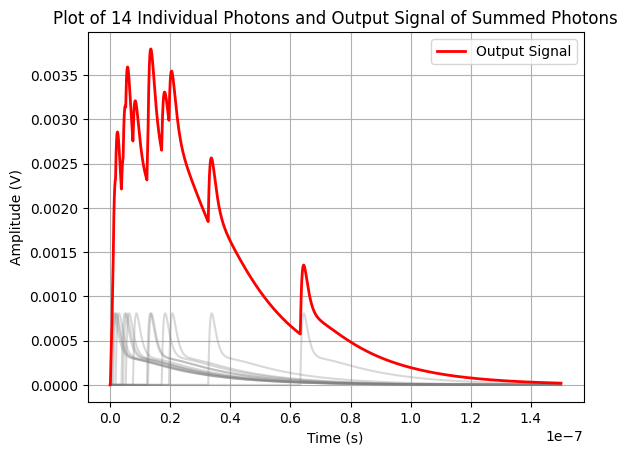

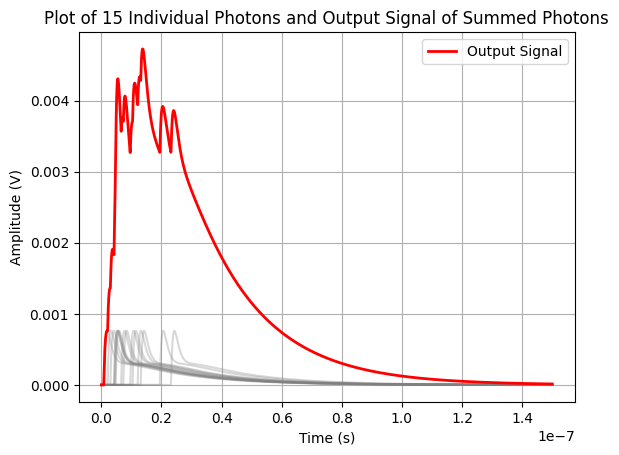

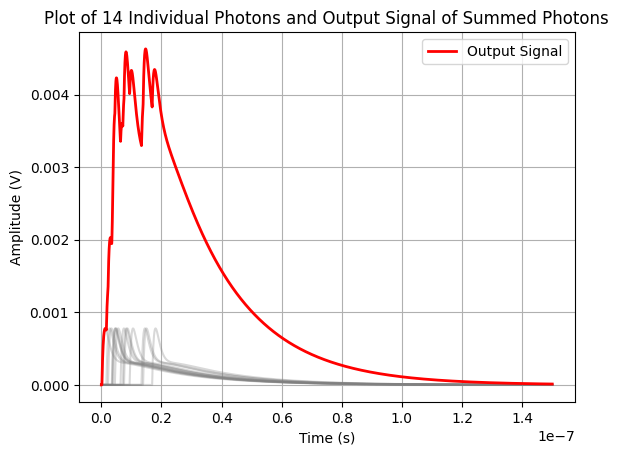

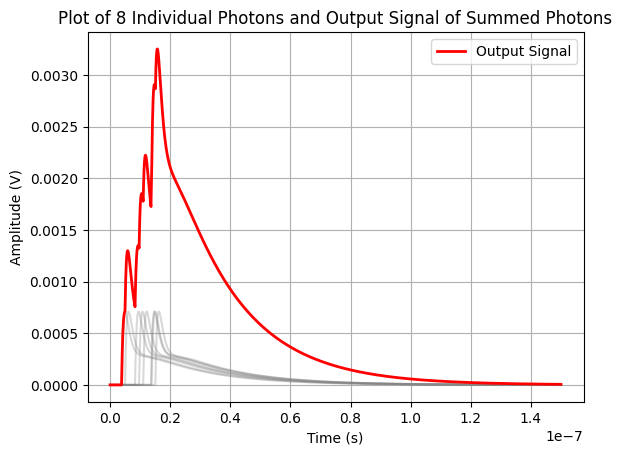

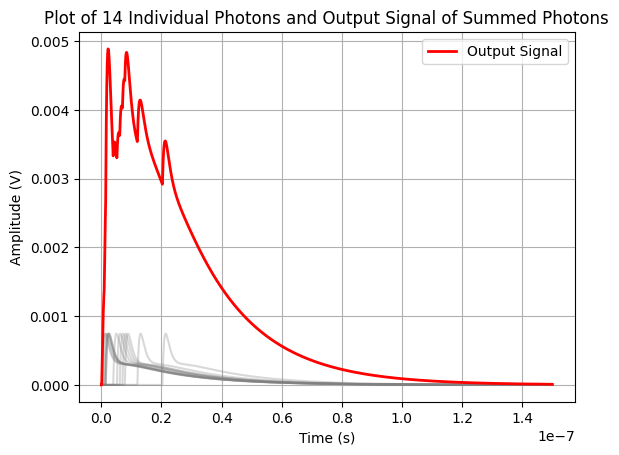

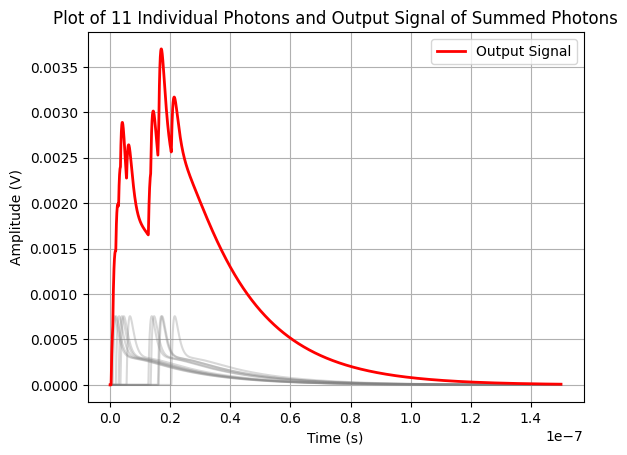

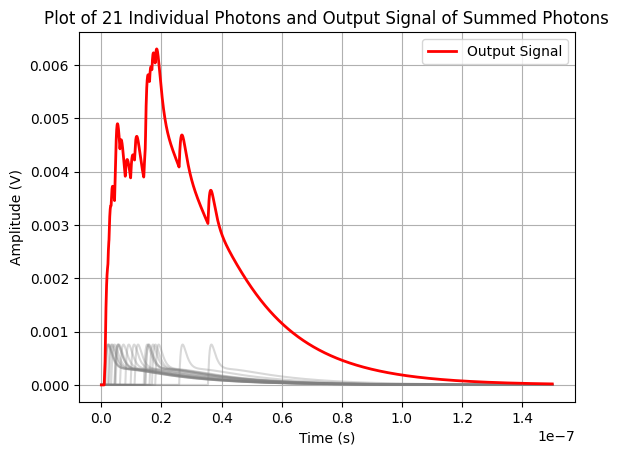

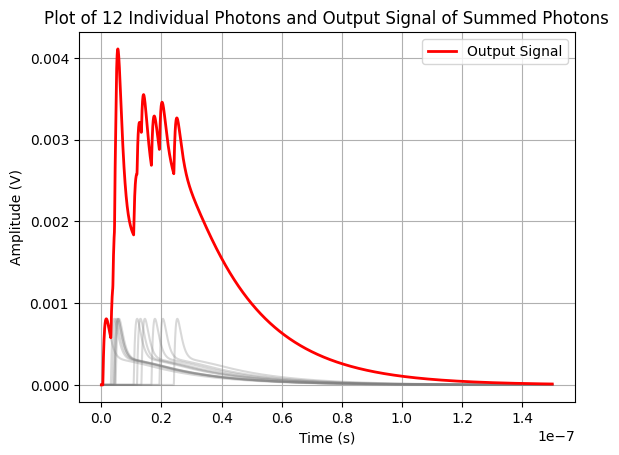

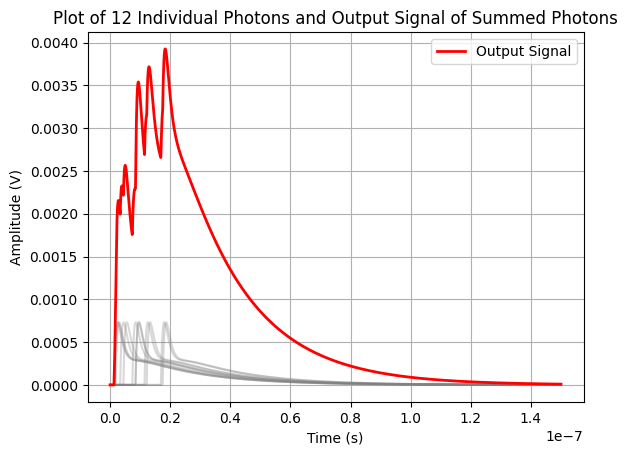

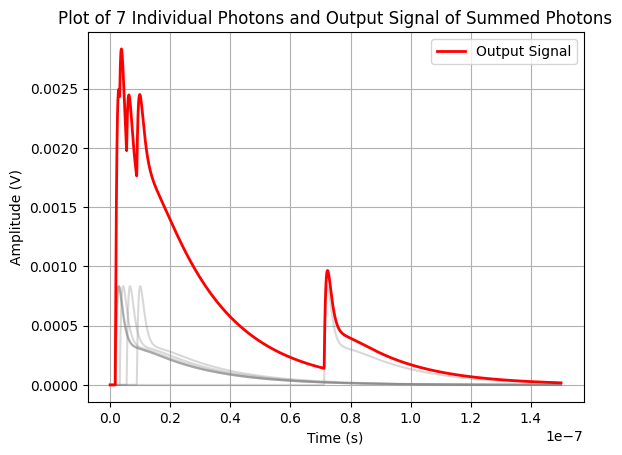

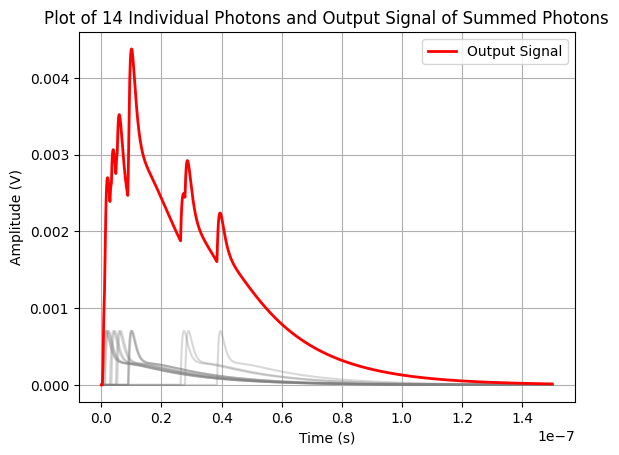

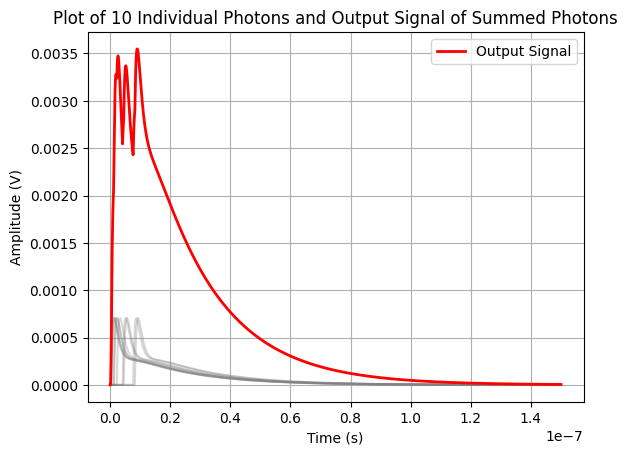

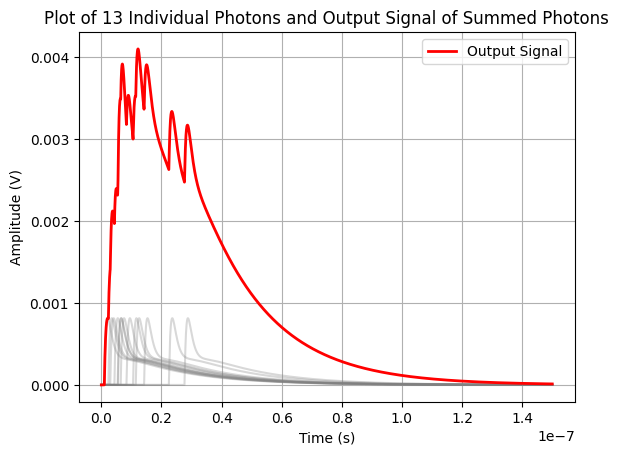

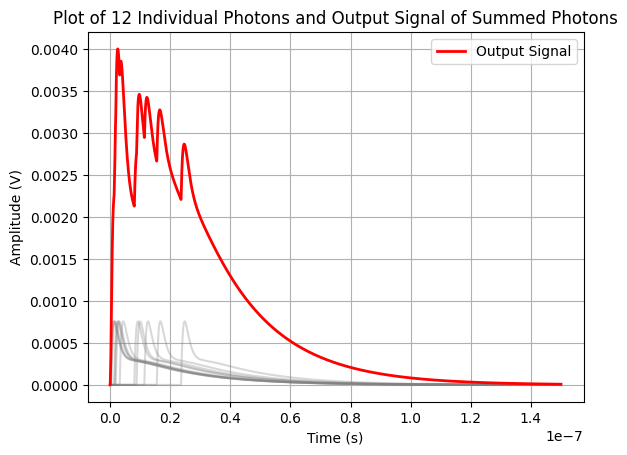

In [7]:
# Generate and export data for different numbers of photons
for index, n in enumerate(poisson_samples):
    simulate_photon_data_real_muon(n, index)

# Codigo para hacer sistematico la simulacion sampleando de la curva

In [2]:
# Define the function
def func_distance(x, A, lambda1, lambda2):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    term1 = A * np.exp(-x/lambda1)
    term2 = (1 - A) * np.exp(-x/lambda2)
    return term1 + term2

def func_signal(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, scale):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=scale, size=n)

def generate_custom_offsets(n, tau1=3.5, tau2=3.7):
    """Generate n random offsets using the custom distribution combining two exponential distributions."""
    scale1 = tau1
    scale2 = tau2
    
    offsets1 = generate_offsets(n, scale1)
    offsets2 = generate_offsets(n, scale2)
    
    combined_offsets = (offsets1 + offsets2)
    return combined_offsets

def concatenate_and_export_photon_signals(x_values, times, time_gap_ns=500):
    all_t_values = []
    all_summed_values = []
    current_time = 0

    # Sample parameters for the Poisson process using func_distance
    A = norm.rvs(loc=42.8, scale=1.8)
    lambda1 = norm.rvs(loc=3.78, scale=0.25)
    lambda2 = norm.rvs(loc=0.035, scale=0.001)
    
    y_values = func_distance(x_values, A, lambda1, lambda2)

    # Generate Poisson samples for each x_value, times times
    poisson_samples = poisson.rvs(mu=np.abs(y_values)[:, np.newaxis], size=(len(x_values), times))

    print("Poisson sampled points:", poisson_samples)

    # Plot the curve and Poisson samples
    plt.figure(figsize=(14, 8))
    plt.plot(x_values, y_values, 'o-', label=f'func_distance with A={A:.2f}, λ1={lambda1:.2f}, λ2={lambda2:.2f}', color='black')
    
    # Plotting each set of samples
    for i in range(times):
        plt.scatter(x_values, poisson_samples[:, i], label=f'Poisson sample set {i+1}', zorder=5)

    plt.title('Function Distance Plot with Poisson Samples')
    plt.xlabel('Distance (m)')
    plt.ylabel('PEs')
    plt.grid(True)
    plt.legend()
    plt.show()

    for index, n_samples in enumerate(poisson_samples):
        for n in n_samples:
            
            #print(n)
            
            # Generate custom offsets for the signal
            random_offsets = generate_custom_offsets(n)
        
            # Generate time values and initialize summed values
            t_values = np.linspace(0, 150, 3000)
            summed_values = np.zeros_like(t_values)

            # Sample parameters for func_signal
            A1 = norm.rvs(loc=0.3, scale=0.01)
            A2 = norm.rvs(loc=23.8, scale=0.2)
            A3 = norm.rvs(loc=1.59, scale=0.01)
            tau1 = norm.rvs(loc=3.9, scale=0.2)
            tau2 = norm.rvs(loc=1.13, scale=0.02)
            tau3 = norm.rvs(loc=22.20, scale=0.4)
            tau4 = norm.rvs(loc=0.251, scale=0.005)


            for offset in random_offsets:
                individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
                summed_values += individual_values

            t_values = t_values * (10 ** -9)

            t_values += current_time
            all_t_values.extend(t_values)
            all_summed_values.extend(summed_values)
            current_time = t_values[-1] + time_gap_ns * 1e-9  # Convert ns to s for the time gap

    # Save the concatenated data to a file
    filename = f"combined_photon_data_{times}_times.txt"
    with open(filename, 'w') as file:
        for t, value in zip(all_t_values, all_summed_values):
            file.write(f"{t}, {value}\n")

    return all_t_values, all_summed_values, poisson_samples

Poisson sampled points: [[53 43 46 ... 44 33 36]
 [39 37 36 ... 33 43 38]
 [35 35 35 ... 36 42 33]
 ...
 [ 8  9 11 ... 11 11 10]
 [11  6  9 ...  9 15 13]
 [12 16  9 ... 12  8 12]]


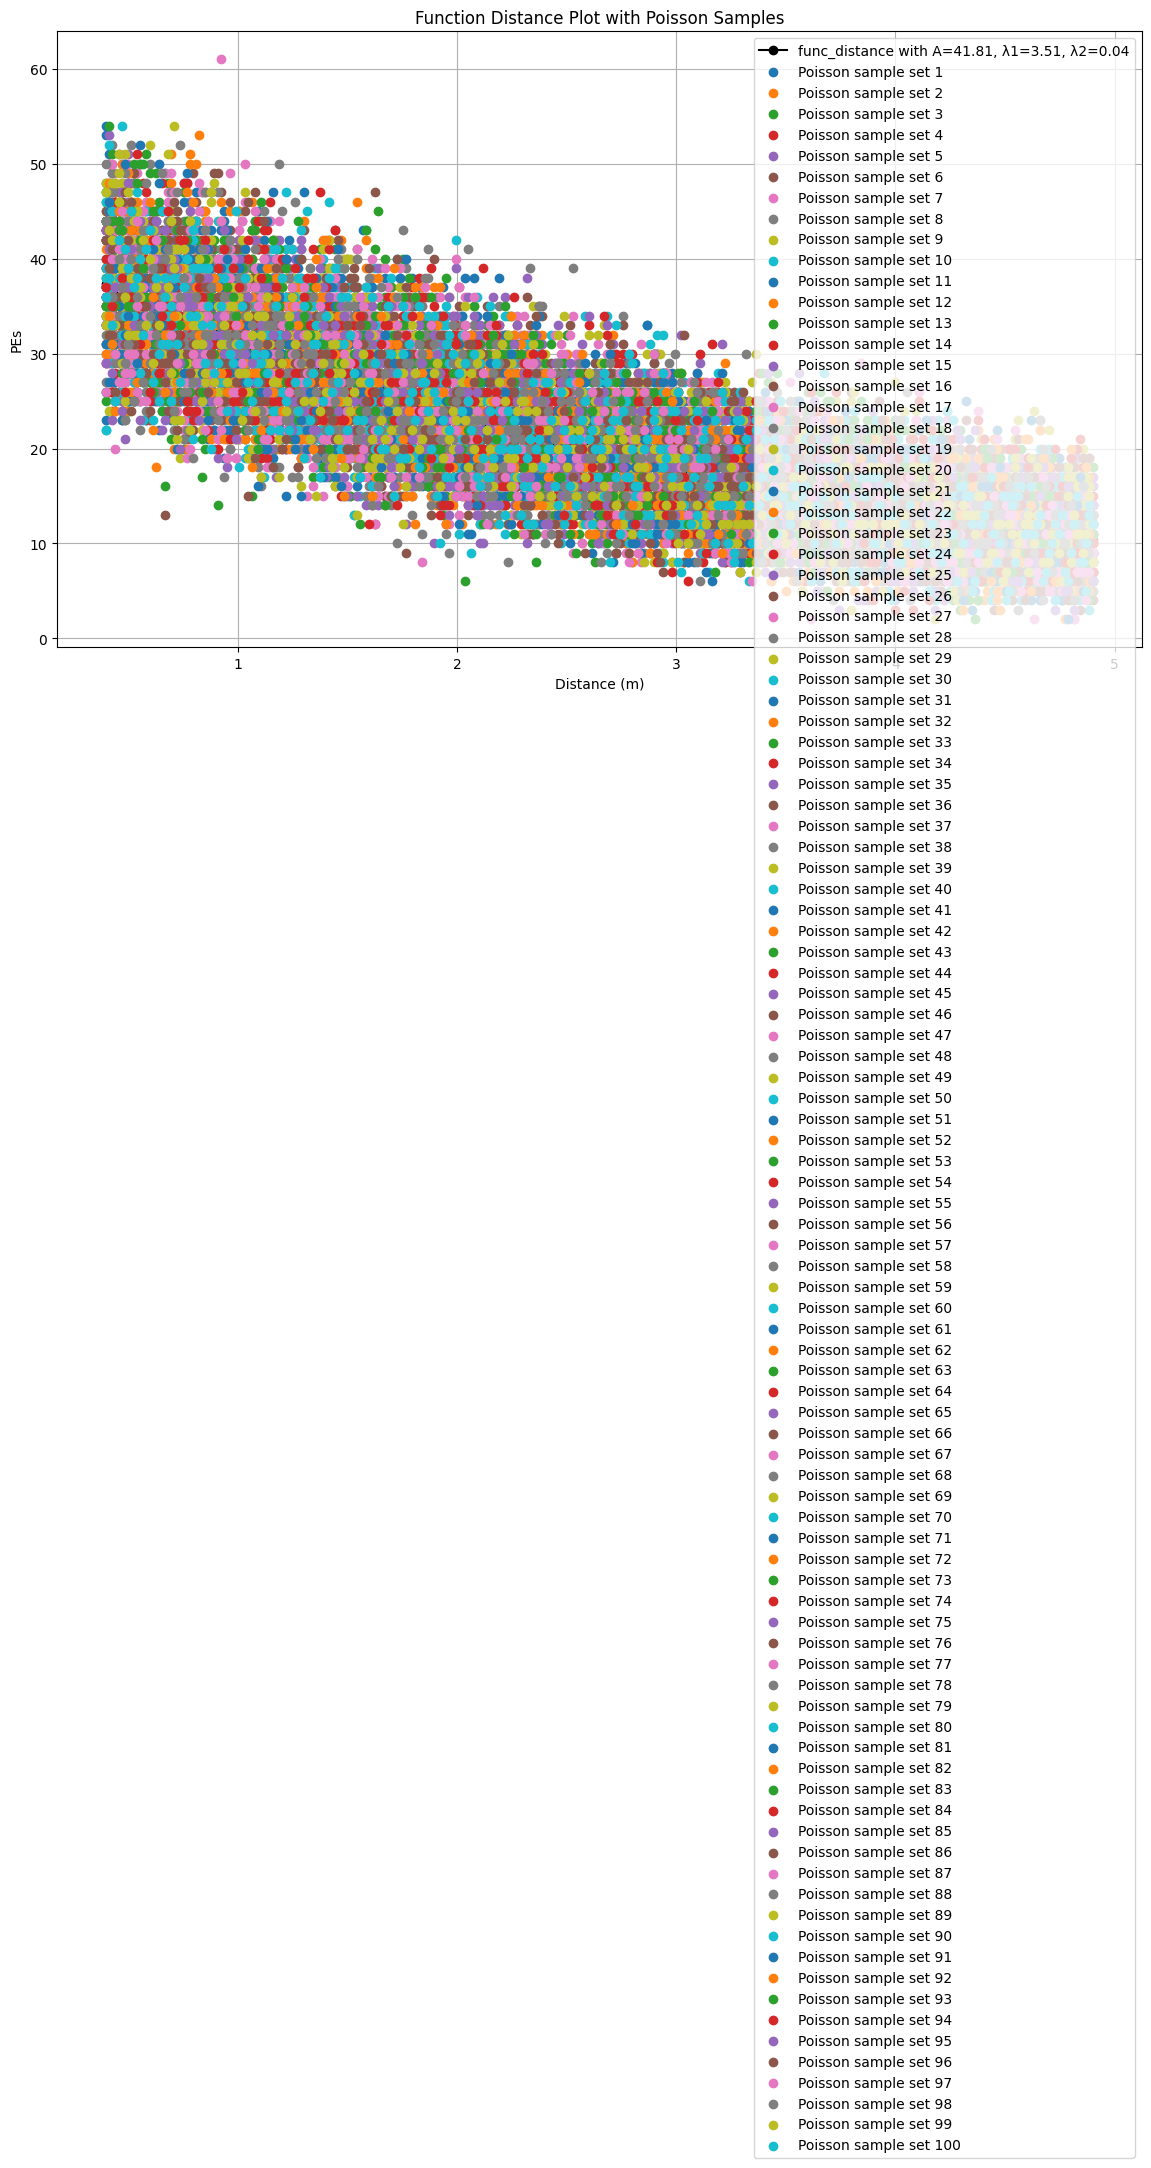

In [3]:
# Example usage with x_values
x_values = np.linspace(0.4, 4.9, 320)  # Example x_values array
time_gap_ns = 10000  # Example time gap
times = 100

all_t_values, all_summed_values, poisson_samples = concatenate_and_export_photon_signals(x_values, times, time_gap_ns)


In [4]:
print(poisson_samples.size)

32000


In [ ]:
# Plot the combined data
plt.figure(figsize=(18, 6))
plt.plot(all_t_values, all_summed_values, color='red', label='Combined Output Signal', linewidth=2)
plt.title('Plot of Combined Output Signal of Photons')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
#plt.xlim(0.6*10**-6, 2*10**-6)
plt.grid(True)
plt.legend()
plt.show()


/home/lautaro/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


## Mismo codigo invertido para el test del PreAmp

Inverted data saved to inverted_combined_photon_data_10_times.txt


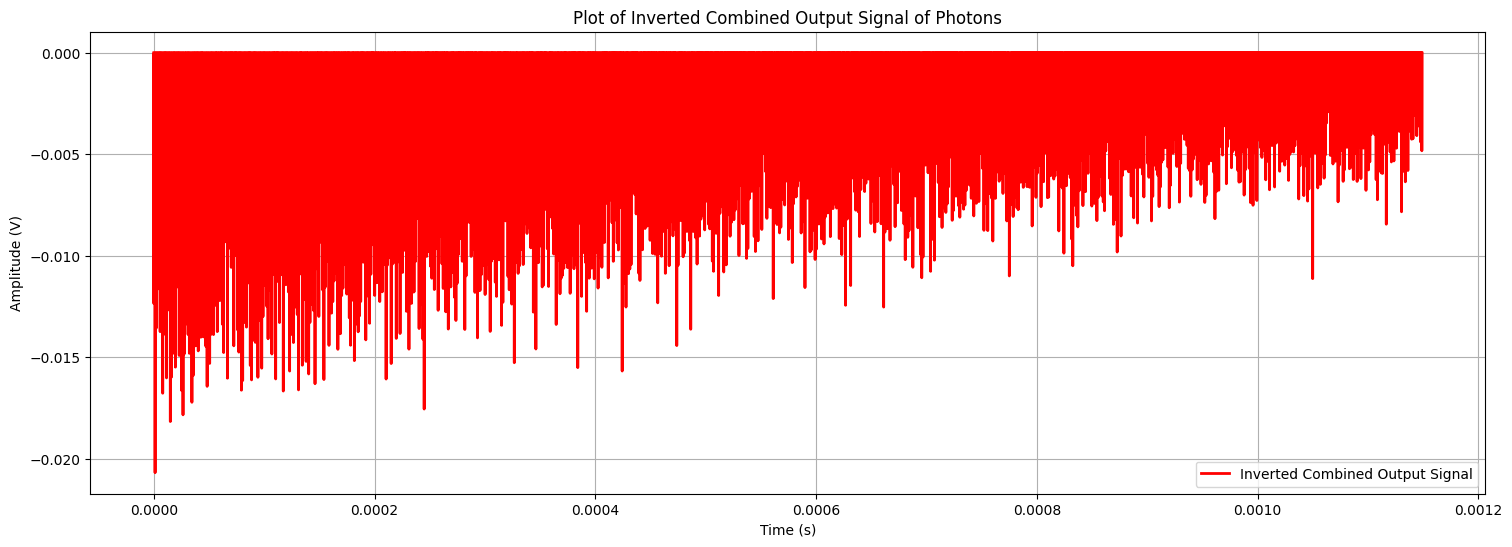

In [18]:
# Invert the combined signal before saving
inverted_summed_values = -np.array(all_summed_values)

# Save the inverted data to a new file
filename = f"inverted_combined_photon_data_{times}_times.txt"
with open(filename, 'w') as file:
    for t, value in zip(all_t_values, inverted_summed_values):
        file.write(f"{t}, {value}\n")

print(f"Inverted data saved to {filename}")

# Plot the inverted combined data
plt.figure(figsize=(18, 6))
plt.plot(all_t_values, inverted_summed_values, color='red', label='Inverted Combined Output Signal', linewidth=2)
plt.title('Plot of Inverted Combined Output Signal of Photons')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()
